# 모듈 Import 및 for_train_data4 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

import random
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from sklearn.metrics import mean_squared_error

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data = pd.read_csv('../data/최종데이터/for_train_data.csv')

In [ ]:
data.drop(data.loc[data['emd_nm']=='알수없음'].index, inplace=True)

In [ ]:
data

term emd_nm  em_g_gap  em_g_gap_rate   em_g_avg     em_g_std  \
0     2018-06-01    건입동   3468900       1.016998   45007516   1486514.83   
1     2018-06-01    남원읍   5900300       1.012975   40838033   2661150.77   
2     2018-06-01    노형동  24880750       1.013611  259129650  10977885.73   
3     2018-06-01    대륜동   5890450       0.993096   55516533   2687943.44   
4     2018-06-01    대정읍   7209750       1.130012   39852700   3021771.90   
...          ...    ...       ...            ...        ...          ...   
1441  2021-06-01    표선면   6873850       1.250997   30022233   3026163.20   
1442  2021-06-01    한경면   3730700       1.182366   18683783   1655205.05   
1443  2021-06-01    한림읍   9728016       1.156950   63382444   4525405.15   
1444  2021-06-01    화북동  27130700       0.957313   95642300  11866245.24   
1445  2021-06-01    효돈동    775450       1.029745   26347916    352582.24   

      resid_reg_pop_gap  resid_reg_pop_gap_rate  resid_reg_pop_avg  \
0                  31.0                0.998265        9799.000000   
1                  66.0                1.003453       19144.000000   
2                  52.0                0.999026       53351.666667   
3                 196.0                1.014548       13553.666667   
4                  86.0                1.004079       21127.666667   
...                 ...                     ...                ...   
1441               50.0                0.997407       12334.333333   
1442               35.0                1.001217        9056.333333   
1443               53.0                0.997696       21248.000000   
1444               13.0                0.999468       24430.333333   
1445               27.0                0.998103        5274.333333   

      resid_reg_pop_std  ...  deli_per_use_amt_std  food_per_use_amt_gap  \
0                 12.68  ...                395.39          10855.341526   
1                 26.98  ...                367.26           7150.172638   
2                 24.51  ...                258.08           7942.755643   
3                 83.69  ...                490.96          16926.371204   
4                 35.11  ...                427.13           7338.892184   
...                 ...  ...                   ...                   ...   
1441              20.68  ...               1175.73           4022.846830   
1442              14.61  ...               1128.05           9838.323734   
1443              24.10  ...                361.87           4790.687573   
1444               5.91  ...                529.50           4776.478277   
1445              11.15  ...               1086.70          10987.312532   

      food_per_use_amt_gap_rate  food_per_use_amt_avg  food_per_use_amt_std  \
0                      1.069767          53964.320945               4530.37   
1                      1.044615          34163.932414               3094.34   
2                      0.963592          39179.948301               3467.90   
3                      0.934366          40692.596709               7476.91   
4                      0.829943          38311.858465               3425.49   
...                         ...                   ...                   ...   
1441                   1.018974          34546.513156               1767.40   
1442                   0.765787          37426.261339               4045.08   
1443                   0.898262          45488.814747               2256.27   
1444                   0.904565          45033.601605               2174.08   
1445                   0.909418          28394.504042               4718.97   

      temperature      rain  fine_dust       em_g  peak  
0       21.721667  8.994167  31.633333   48187900     0  
1       21.721667  8.994167  31.633333   42287450     0  
2       21.721667  8.994167  31.633333  272193365     0  
3       21.721667  8.994167  31.633333   52926700     0  
4       21.721667  8.994167  31.633333   44202200     0  
...           ...       ...        ...        ..

In [ ]:
train = data[data['term'].between('2018-01-01','2021-04-01')]
test = data[data['term'].between('2021-05-01','2021-06-01')]

In [ ]:
train

term emd_nm  em_g_gap  em_g_gap_rate   em_g_avg     em_g_std  \
0     2018-06-01    건입동   3468900       1.016998   45007516   1486514.83   
1     2018-06-01    남원읍   5900300       1.012975   40838033   2661150.77   
2     2018-06-01    노형동  24880750       1.013611  259129650  10977885.73   
3     2018-06-01    대륜동   5890450       0.993096   55516533   2687943.44   
4     2018-06-01    대정읍   7209750       1.130012   39852700   3021771.90   
...          ...    ...       ...            ...        ...          ...   
1357  2021-04-01    표선면   6821950       0.800575   30514400   2813603.94   
1358  2021-04-01    한경면   1511750       0.921586   18636083    637508.57   
1359  2021-04-01    한림읍  10234400       0.854931   65620566   4186727.54   
1360  2021-04-01    화북동  11201900       1.073089  105108816   4637432.23   
1361  2021-04-01    효돈동    941650       0.965139   26635116    406921.15   

      resid_reg_pop_gap  resid_reg_pop_gap_rate  resid_reg_pop_avg  \
0                  31.0                0.998265        9799.000000   
1                  66.0                1.003453       19144.000000   
2                  52.0                0.999026       53351.666667   
3                 196.0                1.014548       13553.666667   
4                  86.0                1.004079       21127.666667   
...                 ...                     ...                ...   
1357               14.0                1.000405       12332.666667   
1358               22.0                1.002439        9029.666667   
1359               15.0                1.000706       21253.333333   
1360               66.0                0.997306       24464.000000   
1361               37.0                1.007068        5253.333333   

      resid_reg_pop_std  ...  deli_per_use_amt_std  food_per_use_amt_gap  \
0                 12.68  ...                395.39          10855.341526   
1                 26.98  ...                367.26           7150.172638   
2                 24.51  ...                258.08           7942.755643   
3                 83.69  ...                490.96          16926.371204   
4                 35.11  ...                427.13           7338.892184   
...                 ...  ...                   ...                   ...   
1357               5.79  ...               1115.13           3148.761891   
1358               8.99  ...                860.07           7064.240694   
1359               6.85  ...                595.68           4133.338512   
1360              27.53  ...                308.20           9827.244273   
1361              15.11  ...                308.25           4527.163898   

      food_per_use_amt_gap_rate  food_per_use_amt_avg  food_per_use_amt_std  \
0                      1.069767          53964.320945               4530.37   
1                      1.044615          34163.932414               3094.34   
2                      0.963592          39179.948301               3467.90   
3                      0.934366          40692.596709               7476.91   
4                      0.829943          38311.858465               3425.49   
...                         ...                   ...                   ...   
1357                   0.993700          32086.756423               1437.57   
1358                   1.202173          39407.907105               3172.16   
1359                   1.083168          44505.691095               1838.63   
1360                   1.226949          43947.970802               4368.66   
1361                   0.972409          28079.572484               1981.69   

      temperature      rain  fine_dust       em_g  peak  
0       21.721667  8.994167  31.633333   48187900     0  
1       21.721667  8.994167  31.633333   42287450     0  
2       21.721667  8.994167  31.633333  272193365     0  
3       21.721667  8.994167  31.633333   52926700     0  
4       21.721667  8.994167  31.633333   44202200     0  
...           ...       ...        ...        ..

In [ ]:
col_list = list(train.columns)
col_list

['term',
 'emd_nm',
 'em_g_gap',
 'em_g_gap_rate',
 'em_g_avg',
 'em_g_std',
 'resid_reg_pop_gap',
 'resid_reg_pop_gap_rate',
 'resid_reg_pop_avg',
 'resid_reg_pop_std',
 'foreign_pop_gap_rate',
 'foreign_pop_std',
 'total_pop_gap',
 'total_pop_gap_rate',
 'total_pop_avg',
 'total_pop_std',
 'f_resid_reg_rate_gap',
 'f_resid_reg_rate_gap_rate',
 'f_resid_reg_rate_avg',
 'f_resid_reg_rate_std',
 'f_foreign_rate_gap',
 'f_foreign_rate_gap_rate',
 'f_foreign_rate_avg',
 'f_foreign_rate_std',
 'f_total_rate_gap',
 'f_total_rate_gap_rate',
 'f_total_rate_avg',
 'f_total_rate_std',
 'floating_resd_rate_gap',
 'floating_resd_rate_gap_rate',
 'floating_resd_rate_avg',
 'floating_resd_rate_std',
 'floating_pop_cnt_gap',
 'floating_pop_cnt_gap_rate',
 'floating_pop_cnt_avg',
 'floating_pop_cnt_std',
 'floating_visit_rate_1020_gap',
 'floating_visit_rate_1020_gap_rate',
 'floating_visit_rate_1020_avg',
 'floating_visit_rate_1020_std',
 'floating_resd_rate_1020_gap',
 'floating_resd_rate_1020_gap_

In [ ]:
data = data.iloc[:,2:]

In [ ]:
test = 'ssr_chi2test'
maxlag = 3
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [ ]:
o = grangers_causation_matrix(data, variables = data.columns)  

C:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have

In [ ]:
o

em_g_gap_x  em_g_avg_x  resid_reg_pop_gap_x  \
em_g_gap_y               1.0000      0.0000               0.0009   
em_g_avg_y               0.5764      1.0000               0.0000   
resid_reg_pop_gap_y      0.0003      0.0000               1.0000   
resid_reg_pop_avg_y      0.0000      0.0000               0.0000   
total_pop_gap_y          0.0002      0.0000               0.0976   
...                         ...         ...                  ...   
temperature_y            0.1270      0.9082               0.8810   
rain_y                   0.3760      0.9540               0.8144   
fine_dust_y              0.7174      0.9012               0.9108   
em_g_y                   0.0634      0.0000               0.0000   
peak_y                   0.8920      0.9590               0.7861   

                     resid_reg_pop_avg_x  total_pop_gap_x  total_pop_avg_x  \
em_g_gap_y                        0.0000           0.0005           0.0000   
em_g_avg_y                        0.0000           0.0000           0.0000   
resid_reg_pop_gap_y               0.0000           0.0360           0.0000   
resid_reg_pop_avg_y               1.0000           0.0000           0.0000   
total_pop_gap_y                   0.0000           1.0000           0.0000   
...                                  ...              ...              ...   
temperature_y                     0.9667           0.9039           0.9660   
rain_y                            0.9200           0.8153           0.9189   
fine_dust_y                       0.9049           0.9284           0.9042   
em_g_y                            0.0000           0.0000           0.0000   
peak_y                            0.9909           0.8255           0.9908   

                     f_resid_reg_rate_gap_x  f_resid_reg_rate_avg_x  \
em_g_gap_y                           0.4362                  0.0000   
em_g_avg_y                           0.0000                  0.0000   
resid_reg_pop_gap_y                  0.0000                  0.0000   
resid_reg_pop_avg_y                  0.0000                  0.0000   
total_pop_gap_y                      0.0000                  0.0000   
...                                     ...                     ...   
temperature_y                        0.2361                  0.8741   
rain_y                               0.8586                  0.9354   
fine_dust_y                          0.9163                  0.9817   
em_g_y                               0.0002                  0.0000   
peak_y                               0.9395                  0.9463   

                     f_foreign_rate_gap_x  f_foreign_rate_avg_x  ...  \
em_g_gap_y                         0.1504                0.0000  ...   
em_g_avg_y                         0.0635                0.0000  ...   
resid_reg_pop_gap_y                0.9009                0.0000  ...   
resid_reg_pop_avg_y                0.0058                0.0000  ...   
total_pop_gap_y                    0.5062                0.0000  ...   
...                                   ...                   ...  ...   
temperature_y                      0.4186                0.7483  ...   
rain_y                             0.4665                0.9605  ...   
fine_dust_y                        0.8274                0.7643  ...   
em_g_y                             0.0986                0.0000  ...   
peak_y                             0.8934                0.9242  ...   

                     mart_per_use_amt_avg_x  deli_per_use_amt_gap_x  \
em_g_gap_y                           0.0000                  0.0096   
em_g_avg_y                           0.0000                  0.0000   
resid_reg_pop_gap_y                  0.0000                  0.0001   
resid_reg_pop_avg_y                  0.0000                  0.0032   
total_pop_gap_y                      0.0000                  0.0002   
...                                     ...                     ...   
temperature_y                        0.2605         

## gap_rate 변수 삭제

In [ ]:
gap_rate = []
for variable in col_list:
    if variable.find('gap_rate') > 0:
        gap_rate.append(variable)
    else:
        pass

In [ ]:
gap_rate

['em_g_gap_rate',
 'resid_reg_pop_gap_rate',
 'foreign_pop_gap_rate',
 'total_pop_gap_rate',
 'f_resid_reg_rate_gap_rate',
 'f_foreign_rate_gap_rate',
 'f_total_rate_gap_rate',
 'floating_resd_rate_gap_rate',
 'floating_pop_cnt_gap_rate',
 'floating_visit_rate_1020_gap_rate',
 'floating_resd_rate_1020_gap_rate',
 'floating_visit_rate_60up_gap_rate',
 'floating_resd_rate_60up_gap_rate',
 'floating_f_visit_rate_gap_rate',
 'floating_f_resd_rate_gap_rate',
 'visit_pop_cnt_gap_rate_sf',
 'rewo_pop_cnt_CVU_lf_gap_rate',
 'rewo_pop_cnt_ETC_lf_gap_rate',
 'visit_pop_cnt_CVU_lf_gap_rate',
 'visit_pop_cnt_ETC_lf_gap_rate',
 'floating_pop_cnt_CVU_lf_gap_rate',
 'floating_pop_cnt_ETC_lf_gap_rate',
 'floating_pop_cnt_lf_gap_rate',
 'visit_rate_CVU_lf_gap_rate',
 'visit_rate_ETC_lf_gap_rate',
 'agri_use_amt_gap_rate',
 'mart_use_amt_gap_rate',
 'deli_use_amt_gap_rate',
 'food_use_amt_gap_rate',
 'agri_per_use_amt_gap_rate',
 'mart_per_use_amt_gap_rate',
 'deli_per_use_amt_gap_rate',
 'food_per_use_

In [ ]:
data.drop(['em_g_gap_rate', 'resid_reg_pop_gap_rate', 'foreign_pop_gap_rate', 'total_pop_gap_rate', 'f_resid_reg_rate_gap_rate',\
 'f_foreign_rate_gap_rate', 'f_total_rate_gap_rate', 'floating_resd_rate_gap_rate', 'floating_pop_cnt_gap_rate',\
 'floating_visit_rate_1020_gap_rate', 'floating_resd_rate_1020_gap_rate', 'floating_visit_rate_60up_gap_rate',\
'floating_resd_rate_60up_gap_rate', 'floating_f_visit_rate_gap_rate', 'floating_f_resd_rate_gap_rate', 'visit_pop_cnt_gap_rate_sf',\
 'rewo_pop_cnt_CVU_lf_gap_rate', 'rewo_pop_cnt_ETC_lf_gap_rate', 'visit_pop_cnt_CVU_lf_gap_rate', 'visit_pop_cnt_ETC_lf_gap_rate',\
 'floating_pop_cnt_CVU_lf_gap_rate', 'floating_pop_cnt_ETC_lf_gap_rate', 'floating_pop_cnt_lf_gap_rate', 'visit_rate_CVU_lf_gap_rate',\
 'visit_rate_ETC_lf_gap_rate', 'agri_use_amt_gap_rate', 'mart_use_amt_gap_rate', 'deli_use_amt_gap_rate', 'food_use_amt_gap_rate',\
 'agri_per_use_amt_gap_rate', 'mart_per_use_amt_gap_rate', 'deli_per_use_amt_gap_rate', 'food_per_use_amt_gap_rate'], axis=1, inplace=True)

# gap 이랑 std 중 더 나은 지표 정하기

## std 삭제
- std와 gap 사이에 상관관계가 1이고, 
- std와 gap 각각 em_g와의 인과관계를 그레인저 인과관계로 본 결과, 차이가 없었음
- 따라서 std를 삭제함

In [ ]:
std = []
for variable in col_list:
    if variable.find('std') > 0:
        std.append(variable)
    else:
        pass

In [ ]:
std

['em_g_std',
 'resid_reg_pop_std',
 'foreign_pop_std',
 'total_pop_std',
 'f_resid_reg_rate_std',
 'f_foreign_rate_std',
 'f_total_rate_std',
 'floating_resd_rate_std',
 'floating_pop_cnt_std',
 'floating_visit_rate_1020_std',
 'floating_resd_rate_1020_std',
 'floating_visit_rate_60up_std',
 'floating_resd_rate_60up_std',
 'floating_f_visit_rate_std',
 'floating_f_resd_rate_std',
 'visit_pop_cnt_std_sf',
 'rewo_pop_cnt_CVU_lf_std',
 'rewo_pop_cnt_ETC_lf_std',
 'visit_pop_cnt_CVU_lf_std',
 'visit_pop_cnt_ETC_lf_std',
 'floating_pop_cnt_CVU_lf_std',
 'floating_pop_cnt_ETC_lf_std',
 'floating_pop_cnt_lf_std',
 'visit_rate_CVU_lf_std',
 'visit_rate_ETC_lf_std',
 'agri_use_amt_std',
 'mart_use_amt_std',
 'deli_use_amt_std',
 'food_use_amt_std',
 'agri_per_use_amt_std',
 'mart_per_use_amt_std',
 'deli_per_use_amt_std',
 'food_per_use_amt_std']

In [ ]:
data.drop(['em_g_std', 'resid_reg_pop_std', 'foreign_pop_std', 'total_pop_std', 'f_resid_reg_rate_std', 'f_foreign_rate_std',\
 'f_total_rate_std', 'floating_resd_rate_std', 'floating_pop_cnt_std', 'floating_visit_rate_1020_std',\
 'floating_resd_rate_1020_std', 'floating_visit_rate_60up_std', 'floating_resd_rate_60up_std', 'floating_f_visit_rate_std',\
 'floating_f_resd_rate_std', 'visit_pop_cnt_std_sf', 'rewo_pop_cnt_CVU_lf_std',\
 'rewo_pop_cnt_ETC_lf_std', 'visit_pop_cnt_CVU_lf_std', 'visit_pop_cnt_ETC_lf_std',\
 'floating_pop_cnt_CVU_lf_std', 'floating_pop_cnt_ETC_lf_std', 'floating_pop_cnt_lf_std', 'visit_rate_CVU_lf_std', \
'visit_rate_ETC_lf_std', 'agri_use_amt_std', 'mart_use_amt_std', 'deli_use_amt_std', 'food_use_amt_std',\
 'agri_per_use_amt_std', 'mart_per_use_amt_std', 'deli_per_use_amt_std', 'food_per_use_amt_std'], axis=1, inplace=True)

# 변수 고르기

In [ ]:
data.columns

Index(['em_g_gap', 'em_g_avg', 'resid_reg_pop_gap', 'resid_reg_pop_avg',
       'total_pop_gap', 'total_pop_avg', 'f_resid_reg_rate_gap',
       'f_resid_reg_rate_avg', 'f_foreign_rate_gap', 'f_foreign_rate_avg',
       'f_total_rate_gap', 'f_total_rate_avg', 'floating_resd_rate_gap',
       'floating_resd_rate_avg', 'floating_pop_cnt_gap',
       'floating_pop_cnt_avg', 'floating_visit_rate_1020_gap',
       'floating_visit_rate_1020_avg', 'floating_resd_rate_1020_gap',
       'floating_resd_rate_1020_avg', 'floating_visit_rate_60up_gap',
       'floating_visit_rate_60up_avg', 'floating_resd_rate_60up_gap',
       'floating_resd_rate_60up_avg', 'floating_f_visit_rate_gap',
       'floating_f_visit_rate_avg', 'floating_f_resd_rate_gap',
       'floating_f_resd_rate_avg', 'visit_pop_cnt', 'visit_pop_cnt_gap_sf',
       'visit_pop_cnt_avg_sf', 'rewo_pop_cnt_CVU_lf_gap',
       'rewo_pop_cnt_CVU_lf_avg', 'rewo_pop_cnt_ETC_lf_gap',
       'rewo_pop_cnt_ETC_lf_avg', 'visit_pop_cnt_CVU_lf_ga

In [ ]:
from statsmodels.tsa.stattools import adfuller 

In [ ]:
def test_stationarity(timeseries, window=12, cutoff=0.01):
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
    
    plt.legend(loc='best')
    plt.title('rolling mean and std')
    plt.show()
    
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag = 'AIC', maxlag=20)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items(): 
        dfoutput['Critival Values(%s)'%key] = value
    pvalue = dftest[1]
    
    if pvalue < cutoff: 
        print('p-value = %.4f. stationary' % pvalue)
    else:
        print('p-value = %.4f. non-stationary' % pvalue)
        
   
    print(dfoutput)

em_g_gap


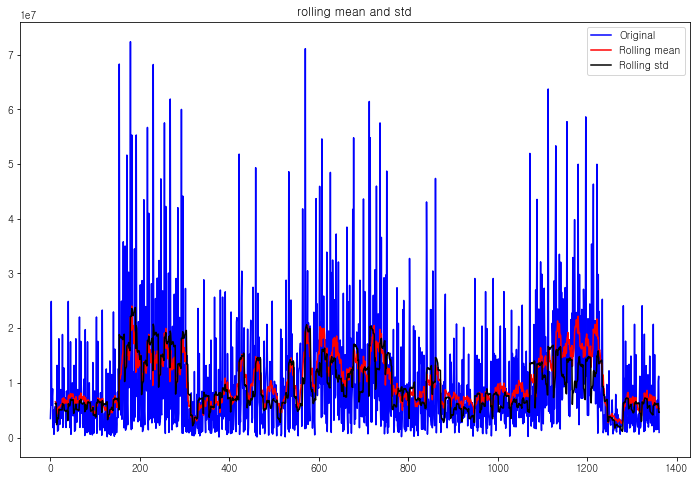

Results of Dickey-Fuller Test
p-value = 0.0004. stationary
Test Statistic                   -4.348084
p-value                           0.000366
#Lags Used                       17.000000
Number of Observations Used    1329.000000
Critival Values(1%)              -3.435280
Critival Values(5%)              -2.863717
Critival Values(10%)             -2.567929
dtype: float64
em_g_avg


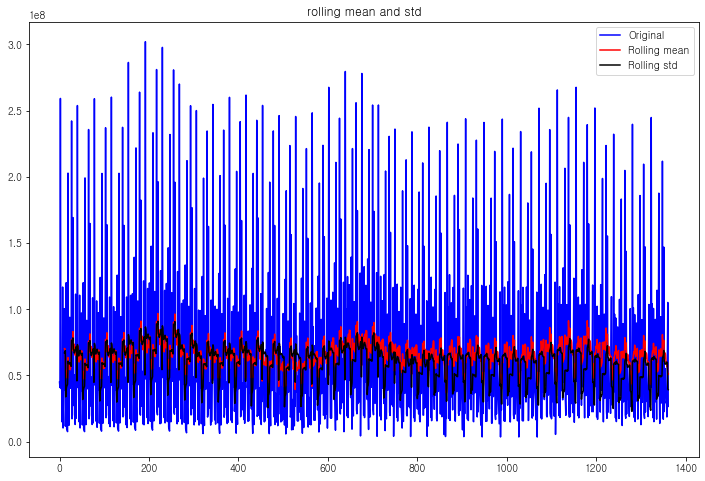

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -8.776555e+00
p-value                        2.439996e-14
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
resid_reg_pop_gap


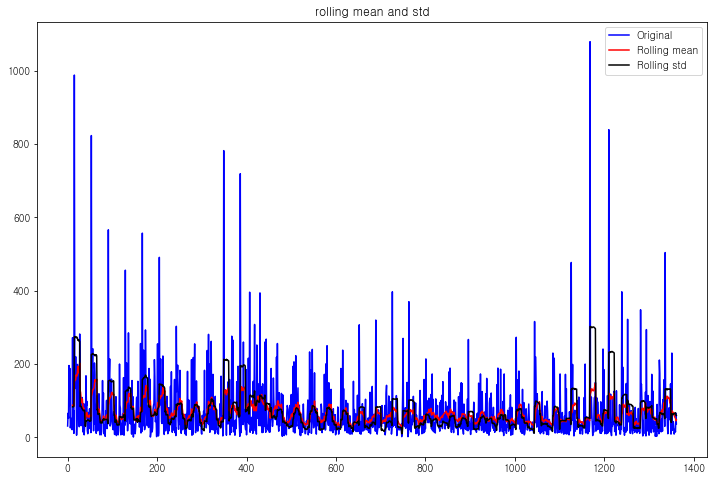

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.637552e+00
p-value                        1.551905e-16
#Lags Used                     1.900000e+01
Number of Observations Used    1.327000e+03
Critival Values(1%)           -3.435287e+00
Critival Values(5%)           -2.863720e+00
Critival Values(10%)          -2.567931e+00
dtype: float64
resid_reg_pop_avg


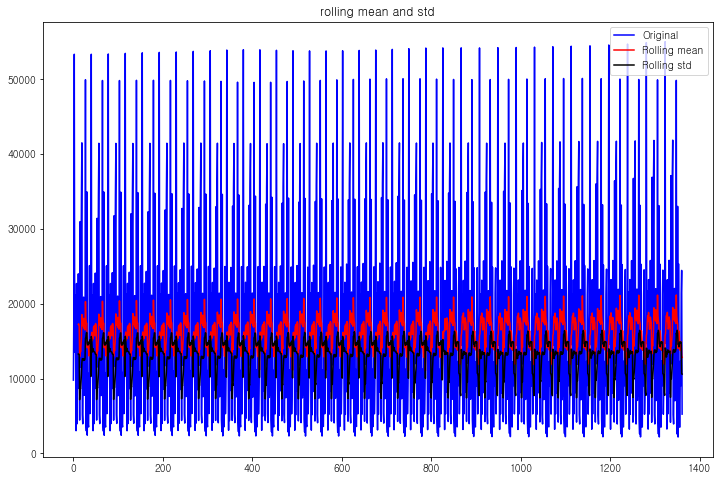

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.283697e+01
p-value                        5.713304e-24
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
total_pop_gap


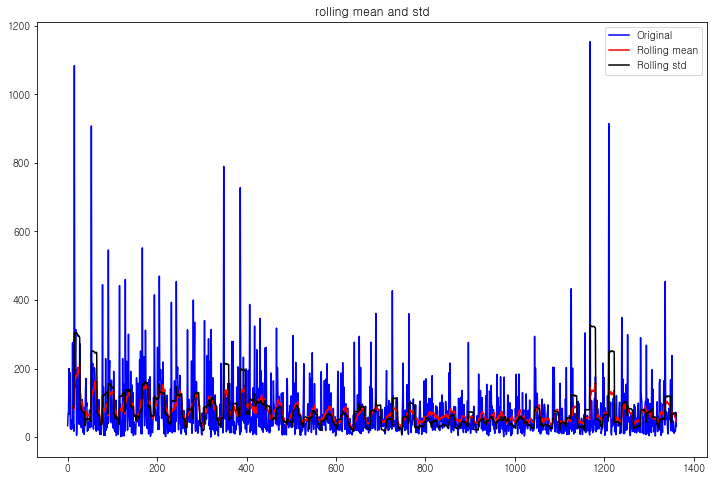

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.322941e+00
p-value                        9.781293e-16
#Lags Used                     1.600000e+01
Number of Observations Used    1.330000e+03
Critival Values(1%)           -3.435276e+00
Critival Values(5%)           -2.863716e+00
Critival Values(10%)          -2.567928e+00
dtype: float64
total_pop_avg


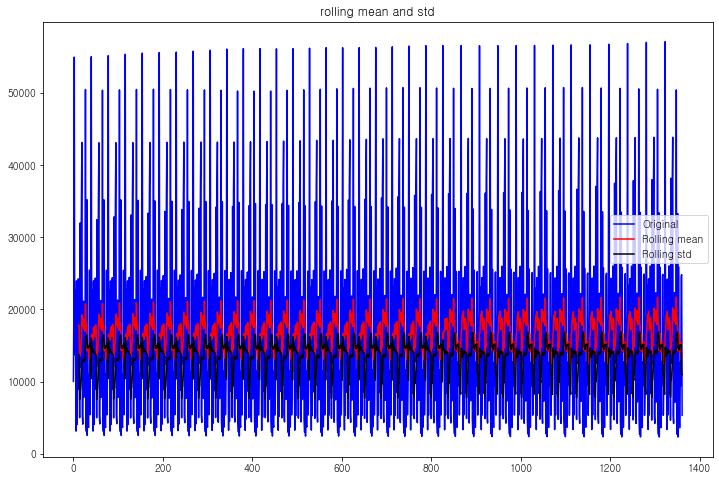

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.280932e+01
p-value                        6.497563e-24
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
f_resid_reg_rate_gap


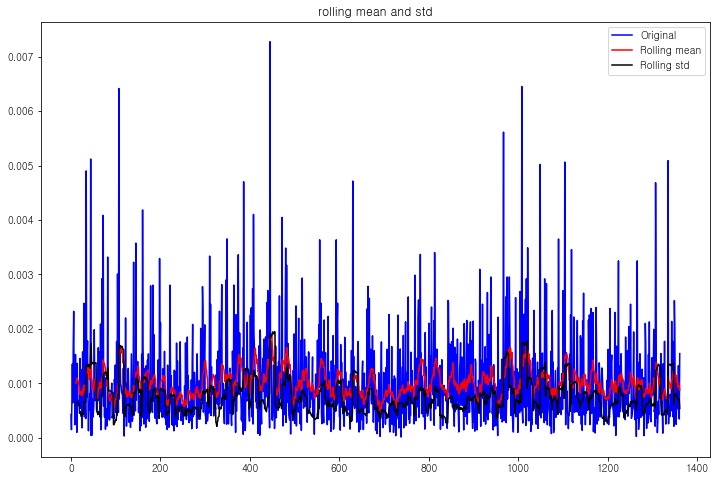

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.033569e+00
p-value                        5.363654e-15
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
f_resid_reg_rate_avg


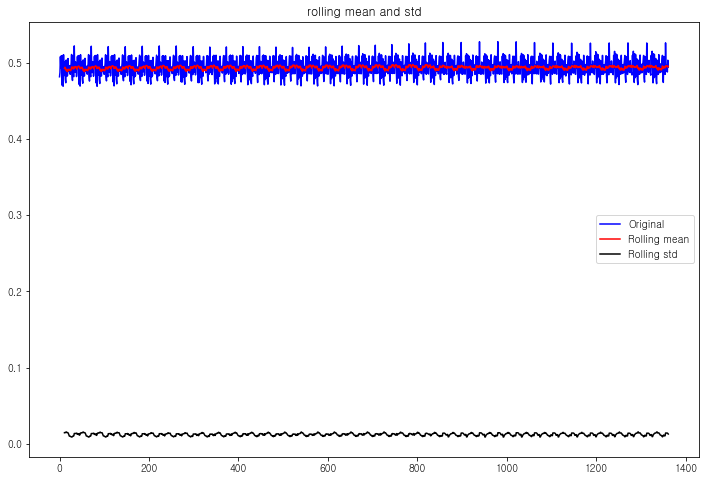

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.293811e+01
p-value                        3.582028e-24
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
f_foreign_rate_gap


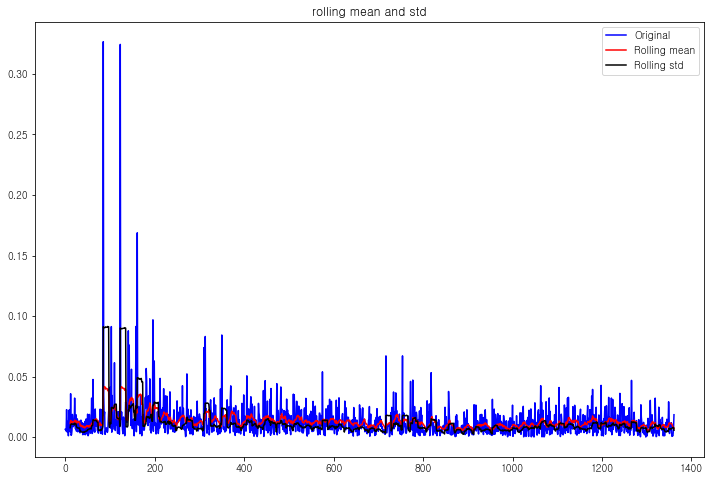

Results of Dickey-Fuller Test
p-value = 0.0002. stationary
Test Statistic                   -4.512774
p-value                           0.000186
#Lags Used                       19.000000
Number of Observations Used    1327.000000
Critival Values(1%)              -3.435287
Critival Values(5%)              -2.863720
Critival Values(10%)             -2.567931
dtype: float64
f_foreign_rate_avg


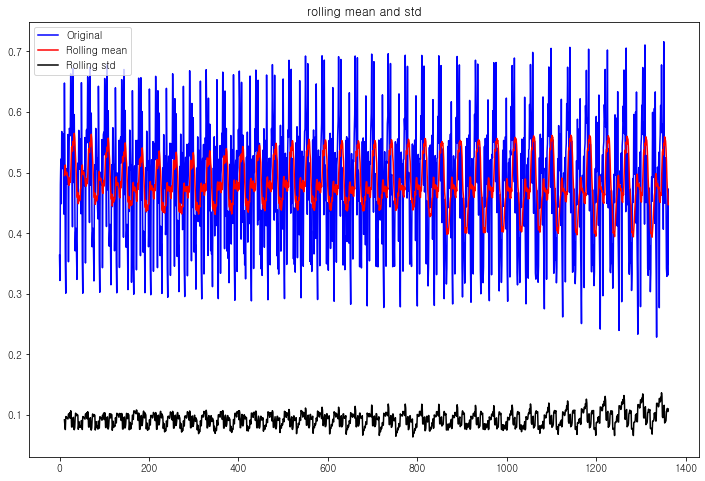

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.050426e+01
p-value                        1.064357e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
f_total_rate_gap


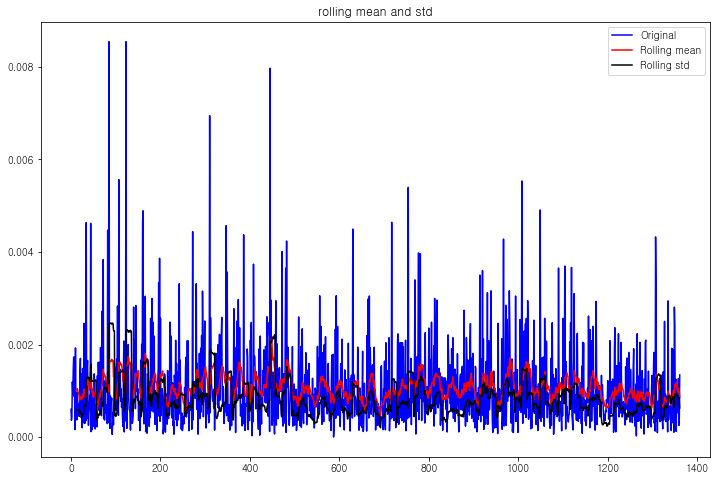

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.394463e+01
p-value                        4.822374e-26
#Lags Used                     8.000000e+00
Number of Observations Used    1.338000e+03
Critival Values(1%)           -3.435247e+00
Critival Values(5%)           -2.863703e+00
Critival Values(10%)          -2.567921e+00
dtype: float64
f_total_rate_avg


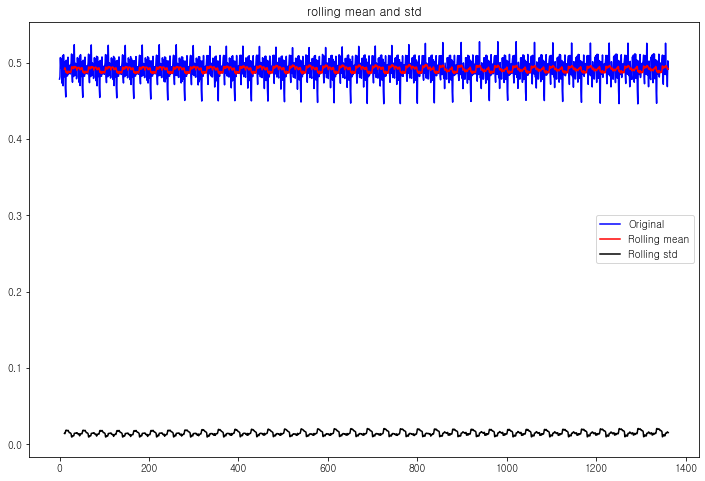

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.342074e+01
p-value                        4.194647e-25
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_resd_rate_gap


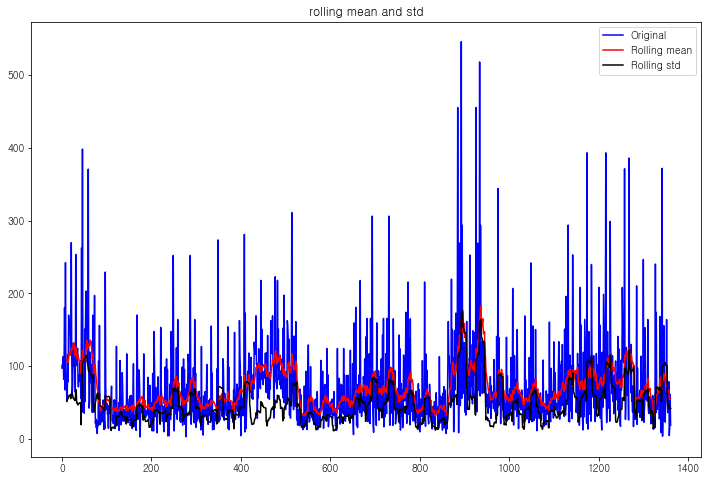

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -5.728731e+00
p-value                        6.676659e-07
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_resd_rate_avg


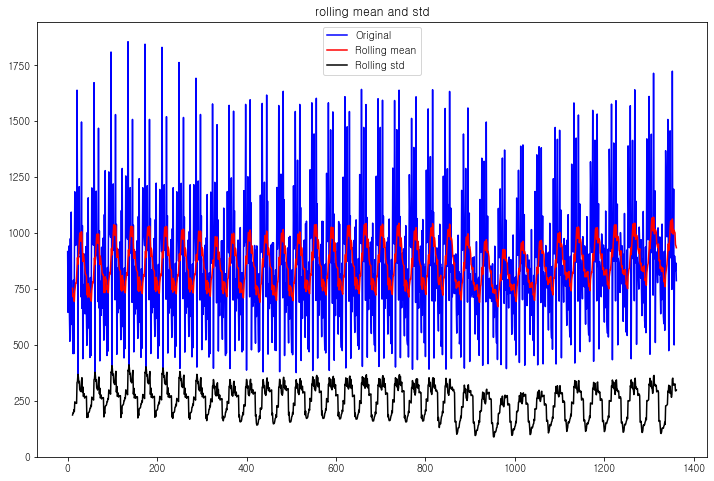

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.620204e+01
p-value                        4.067867e-29
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_pop_cnt_gap


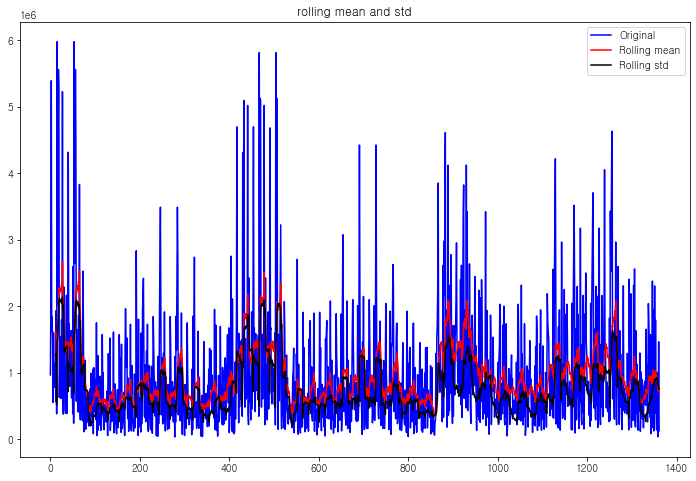

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -5.194027
p-value                           0.000009
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
floating_pop_cnt_avg


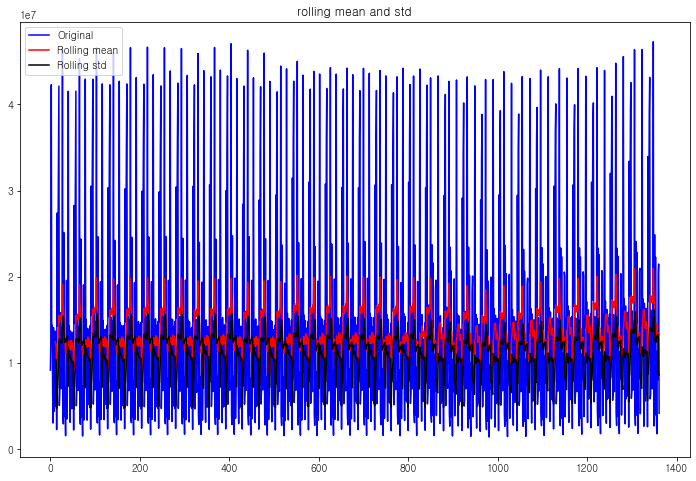

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.144687e+01
p-value                        5.988827e-21
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_visit_rate_1020_gap


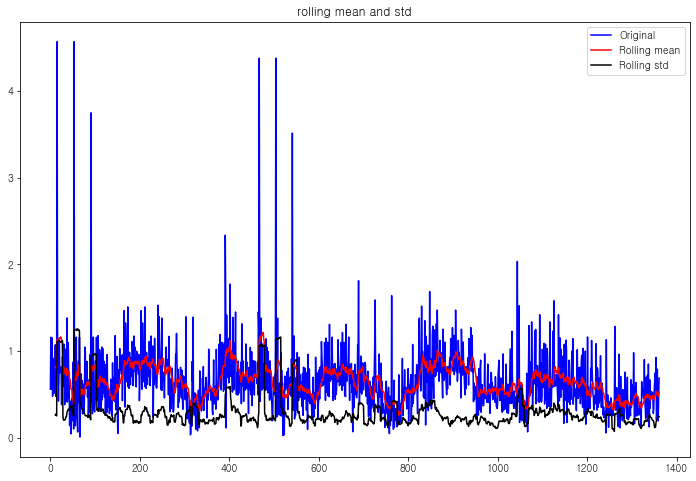

Results of Dickey-Fuller Test
p-value = 0.0001. stationary
Test Statistic                   -4.632416
p-value                           0.000113
#Lags Used                       19.000000
Number of Observations Used    1327.000000
Critival Values(1%)              -3.435287
Critival Values(5%)              -2.863720
Critival Values(10%)             -2.567931
dtype: float64
floating_visit_rate_1020_avg


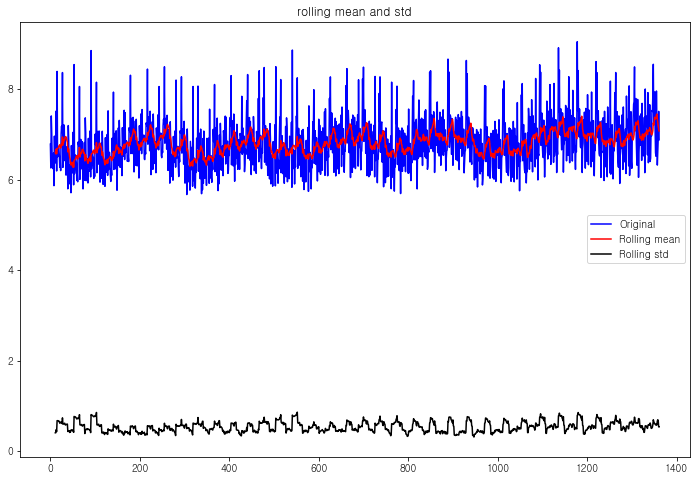

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -5.793547e+00
p-value                        4.810055e-07
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
floating_resd_rate_1020_gap


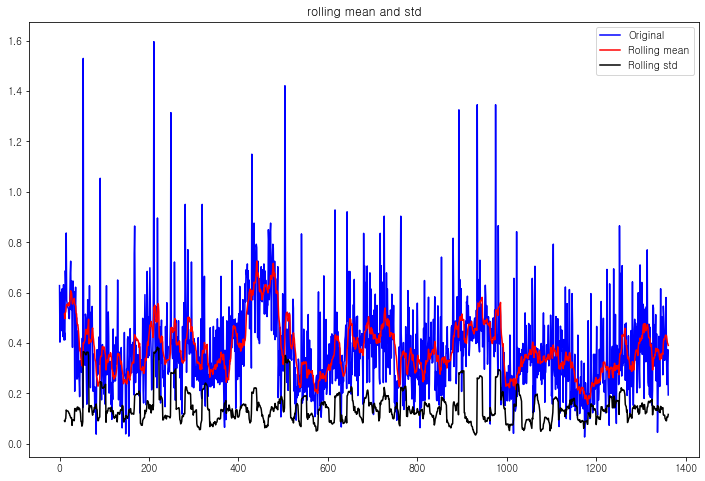

Results of Dickey-Fuller Test
p-value = 0.0001. stationary
Test Statistic                   -4.663545
p-value                           0.000098
#Lags Used                       16.000000
Number of Observations Used    1330.000000
Critival Values(1%)              -3.435276
Critival Values(5%)              -2.863716
Critival Values(10%)             -2.567928
dtype: float64
floating_resd_rate_1020_avg


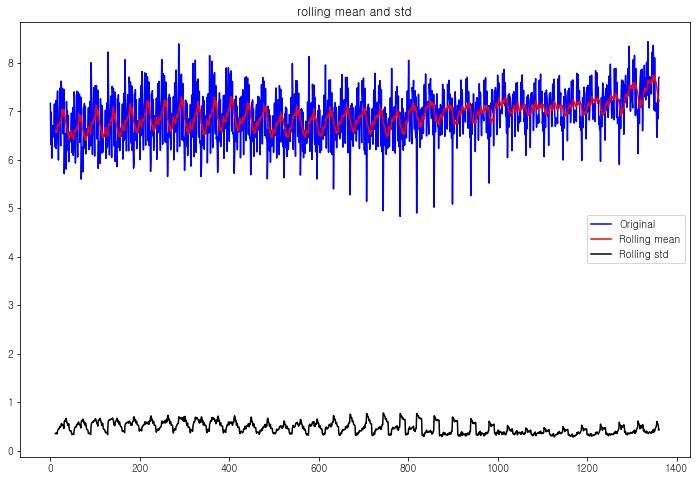

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -6.070727e+00
p-value                        1.152587e-07
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_visit_rate_60up_gap


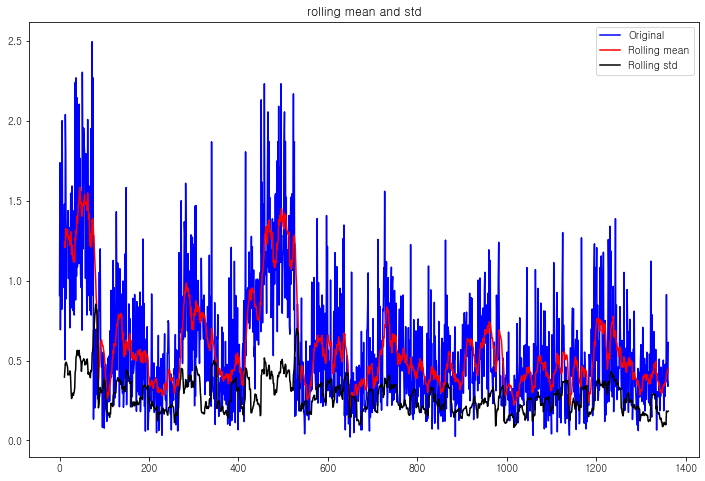

Results of Dickey-Fuller Test
p-value = 0.0060. stationary
Test Statistic                   -3.588183
p-value                           0.005991
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
floating_visit_rate_60up_avg


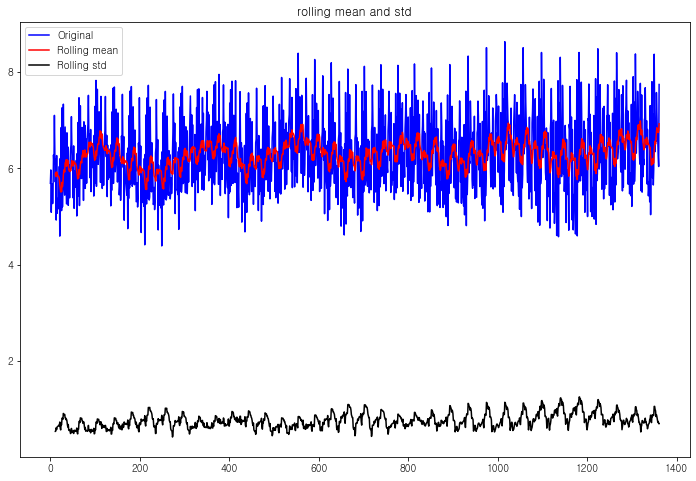

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -4.957538
p-value                           0.000027
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
floating_resd_rate_60up_gap


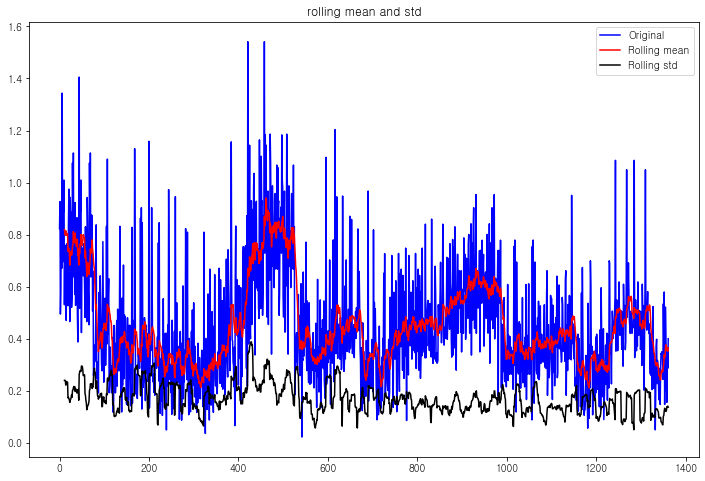

Results of Dickey-Fuller Test
p-value = 0.0242. stationary
Test Statistic                   -3.133099
p-value                           0.024199
#Lags Used                       16.000000
Number of Observations Used    1330.000000
Critival Values(1%)              -3.435276
Critival Values(5%)              -2.863716
Critival Values(10%)             -2.567928
dtype: float64
floating_resd_rate_60up_avg


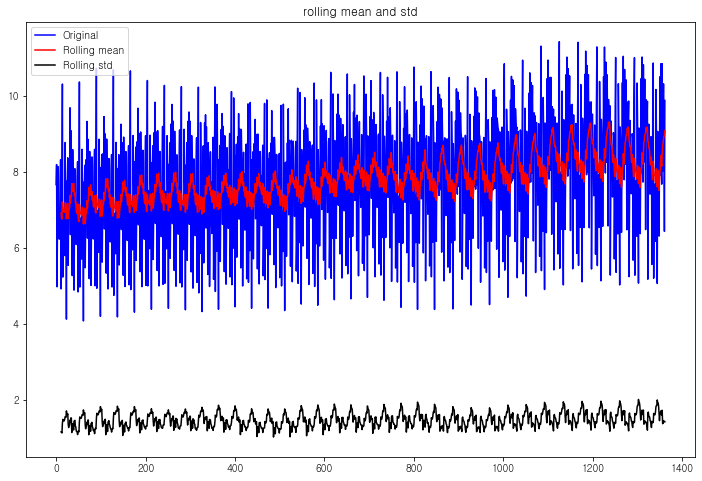

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -4.969879
p-value                           0.000025
#Lags Used                       19.000000
Number of Observations Used    1327.000000
Critival Values(1%)              -3.435287
Critival Values(5%)              -2.863720
Critival Values(10%)             -2.567931
dtype: float64
floating_f_visit_rate_gap


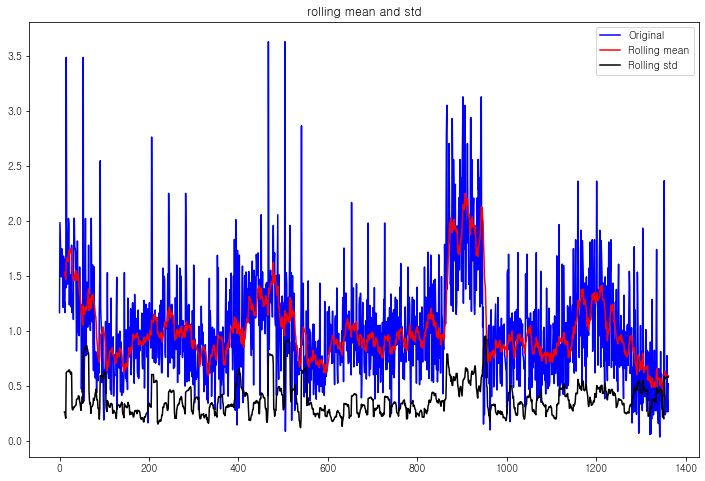

Results of Dickey-Fuller Test
p-value = 0.0152. stationary
Test Statistic                   -3.292814
p-value                           0.015203
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
floating_f_visit_rate_avg


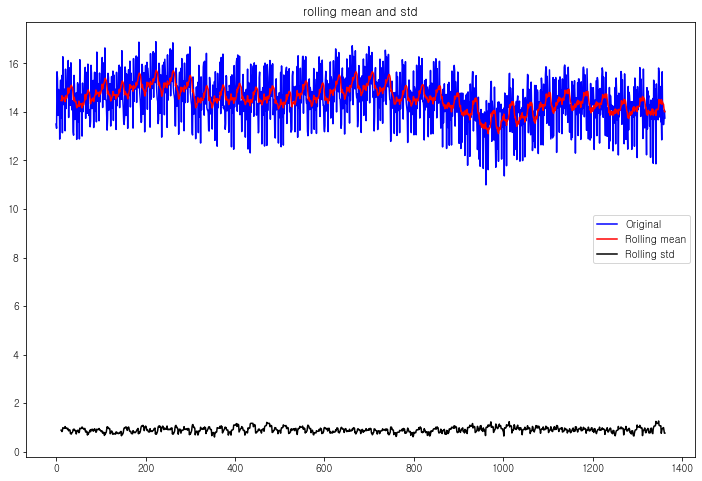

Results of Dickey-Fuller Test
p-value = 0.0014. stationary
Test Statistic                   -4.010874
p-value                           0.001355
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
floating_f_resd_rate_gap


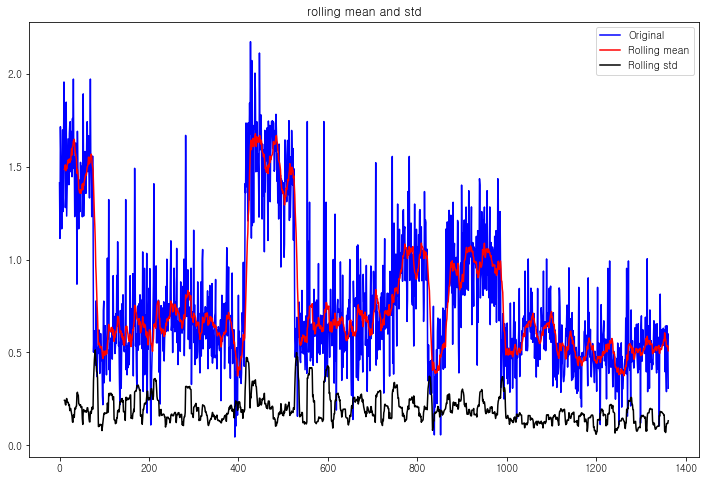

Results of Dickey-Fuller Test
p-value = 0.0086. stationary
Test Statistic                   -3.478185
p-value                           0.008565
#Lags Used                        9.000000
Number of Observations Used    1337.000000
Critival Values(1%)              -3.435250
Critival Values(5%)              -2.863704
Critival Values(10%)             -2.567922
dtype: float64
floating_f_resd_rate_avg


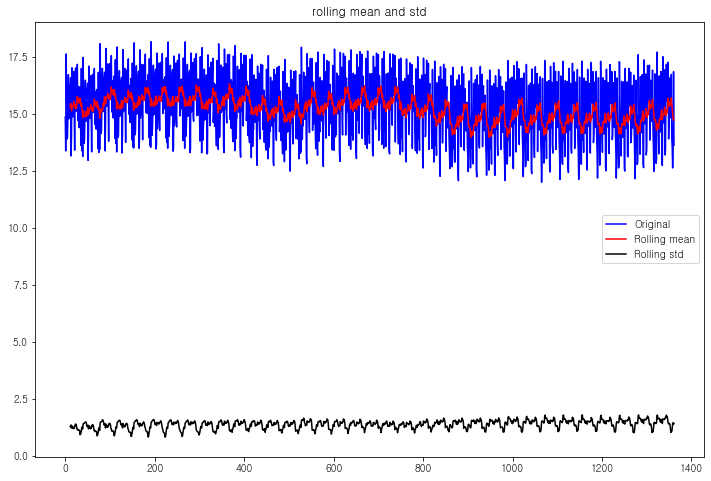

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -4.857319
p-value                           0.000042
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
visit_pop_cnt


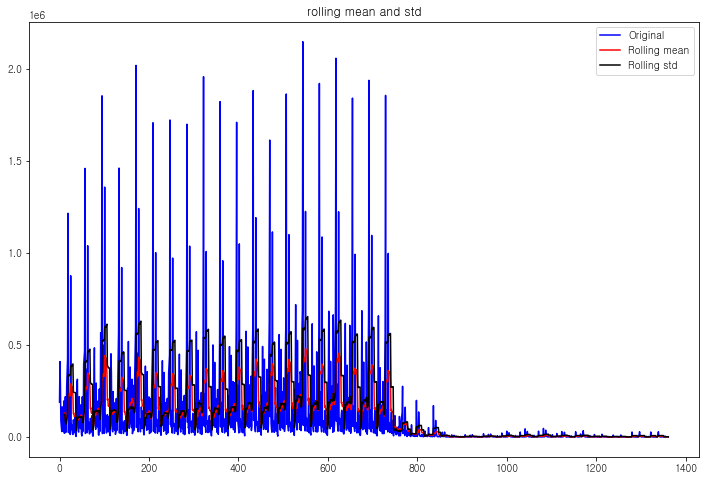

Results of Dickey-Fuller Test
p-value = 0.0004. stationary
Test Statistic                   -4.330012
p-value                           0.000394
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
visit_pop_cnt_gap_sf


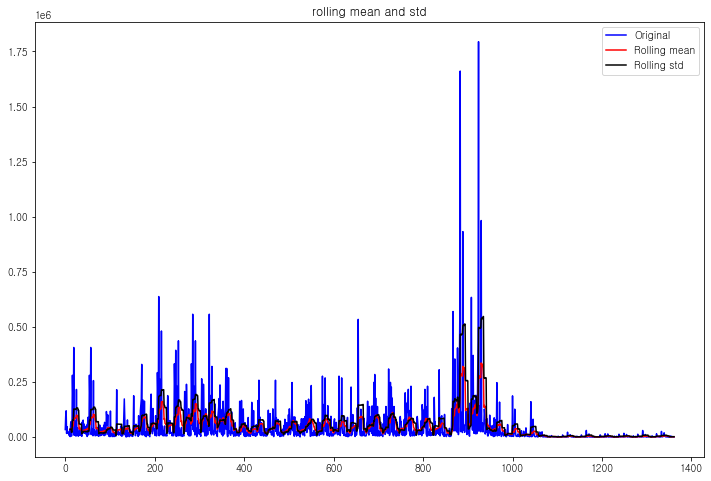

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -5.341463
p-value                           0.000004
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
visit_pop_cnt_avg_sf


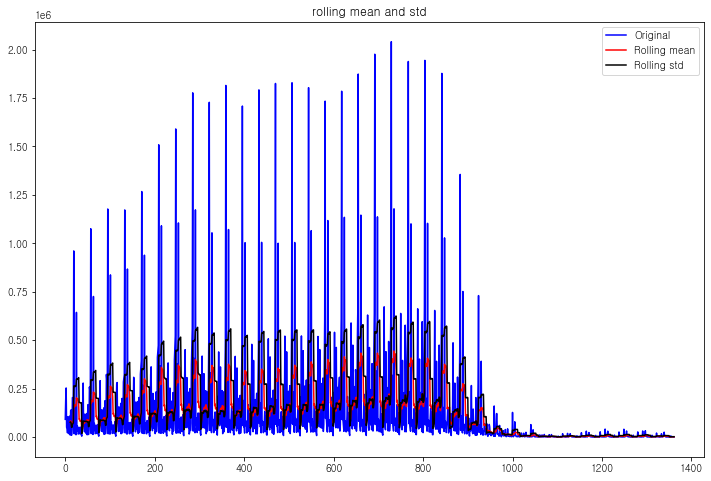

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -4.858602
p-value                           0.000042
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
rewo_pop_cnt_CVU_lf_gap


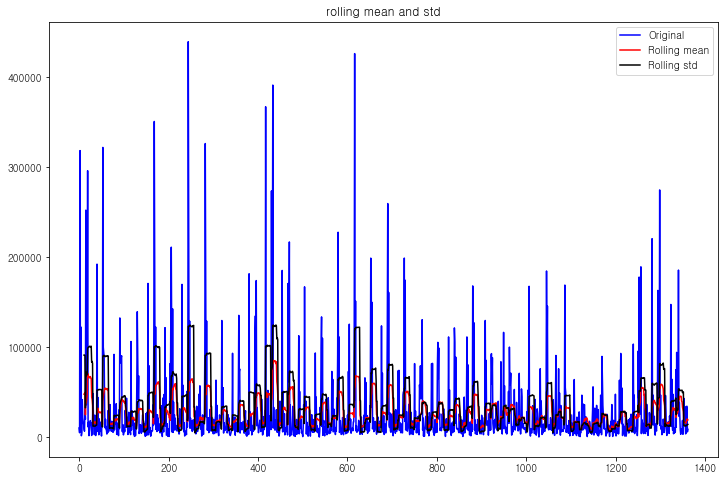

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -8.858946e+00
p-value                        1.501087e-14
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
rewo_pop_cnt_CVU_lf_avg


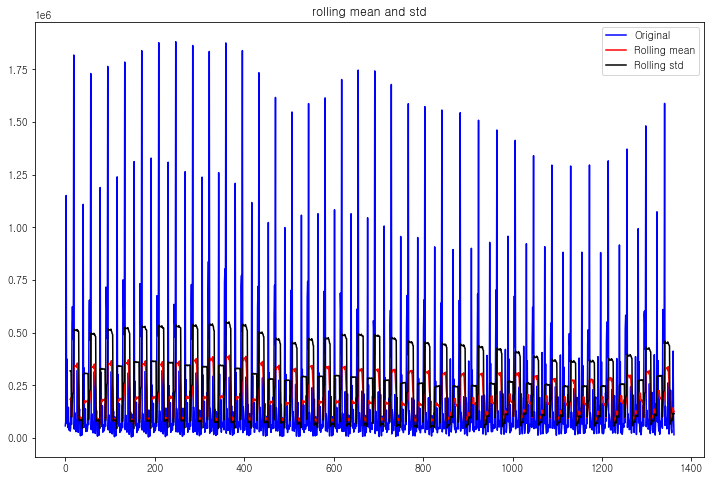

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.529477e+00
p-value                        2.916902e-16
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
rewo_pop_cnt_ETC_lf_gap


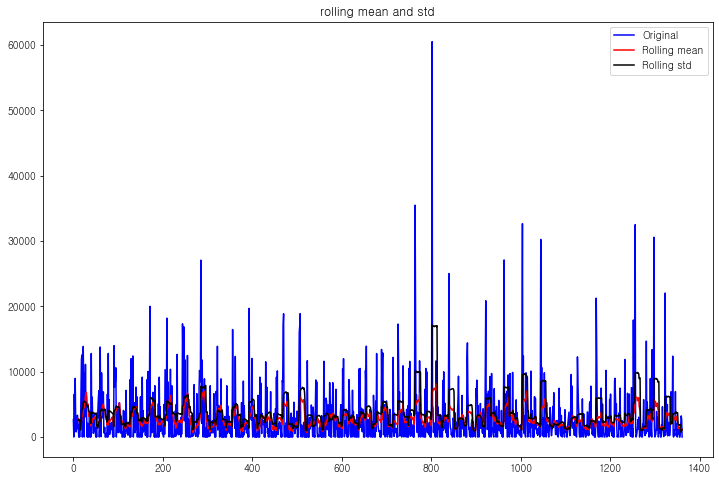

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.129779e+01
p-value                        1.330417e-20
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
rewo_pop_cnt_ETC_lf_avg


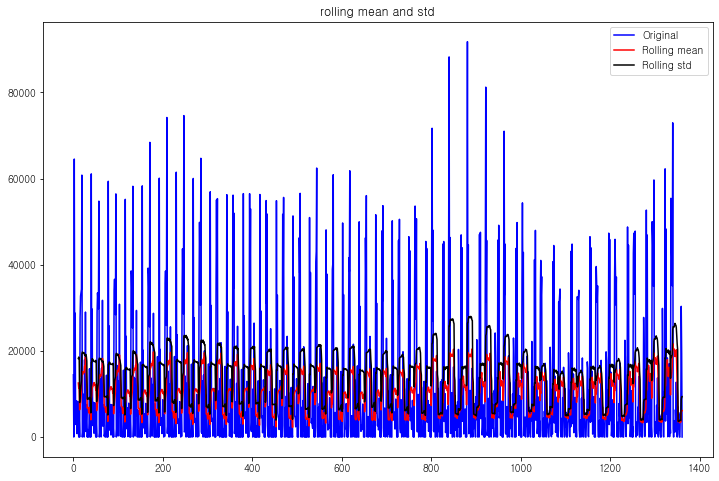

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.183331e+01
p-value                        7.897391e-22
#Lags Used                     1.900000e+01
Number of Observations Used    1.327000e+03
Critival Values(1%)           -3.435287e+00
Critival Values(5%)           -2.863720e+00
Critival Values(10%)          -2.567931e+00
dtype: float64
visit_pop_cnt_CVU_lf_gap


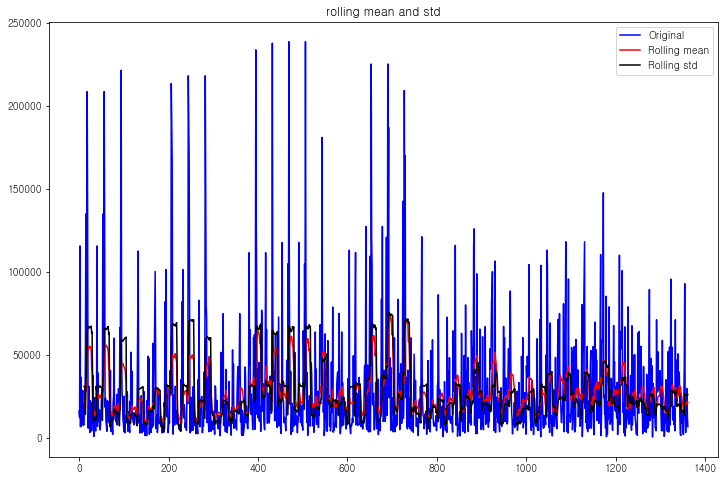

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.033287e+01
p-value                        2.812649e-18
#Lags Used                     1.800000e+01
Number of Observations Used    1.328000e+03
Critival Values(1%)           -3.435284e+00
Critival Values(5%)           -2.863719e+00
Critival Values(10%)          -2.567930e+00
dtype: float64
visit_pop_cnt_CVU_lf_avg


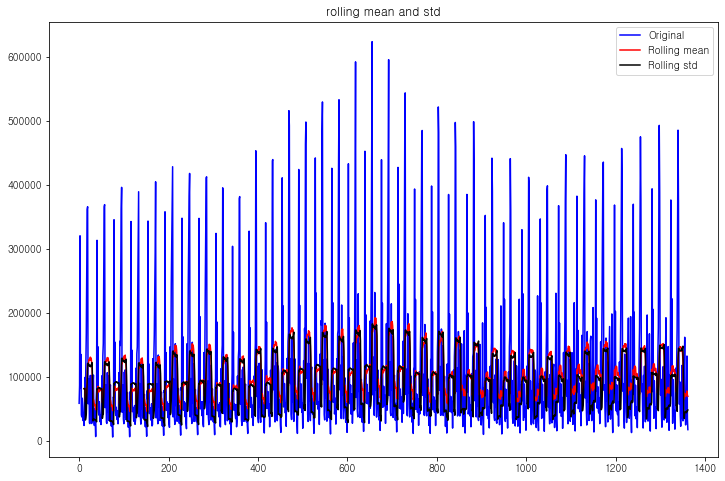

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.009156e+01
p-value                        1.118673e-17
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
visit_pop_cnt_ETC_lf_gap


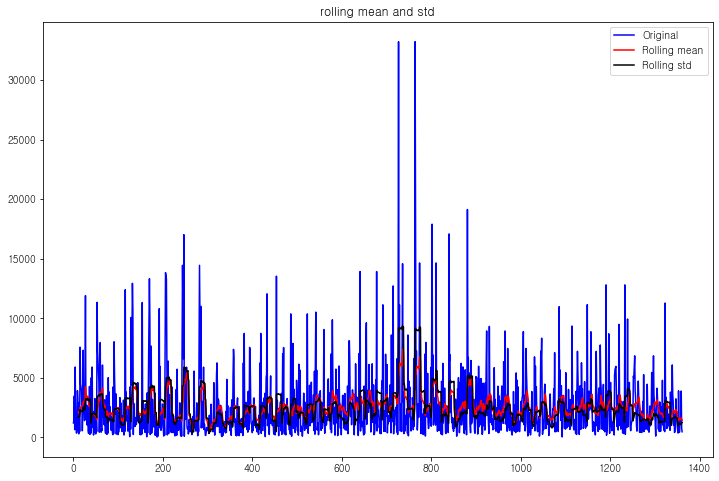

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -8.308649e+00
p-value                        3.842015e-13
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
visit_pop_cnt_ETC_lf_avg


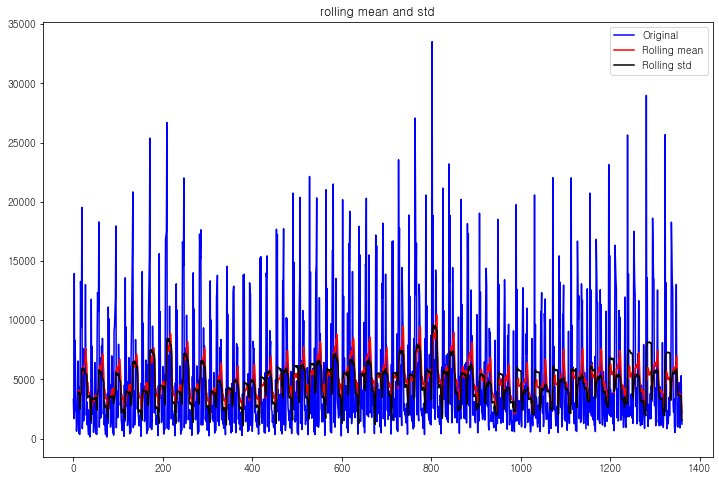

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.259647e+00
p-value                        1.418448e-15
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_pop_cnt_CVU_lf_gap


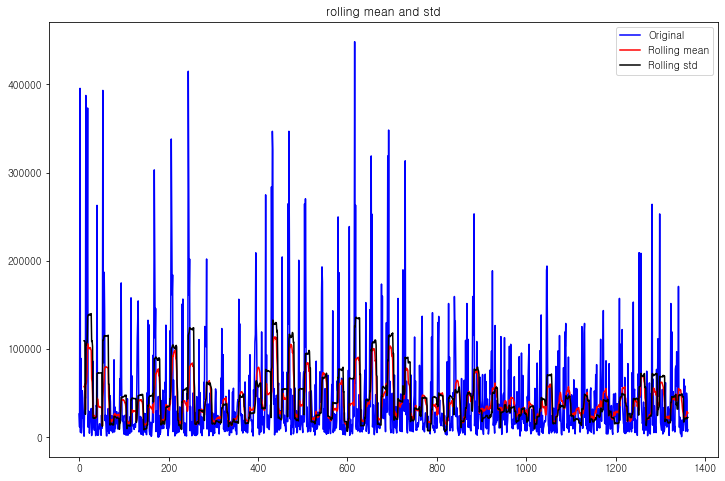

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.133247e+01
p-value                        1.104106e-20
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
floating_pop_cnt_CVU_lf_avg


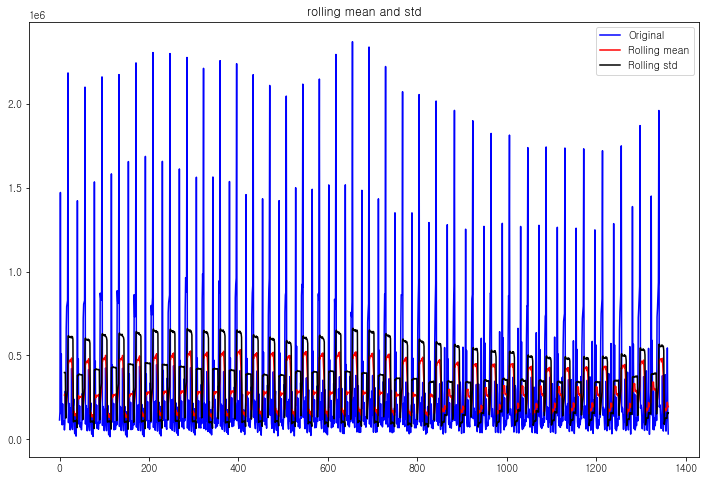

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.017263e+01
p-value                        7.024252e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
floating_pop_cnt_ETC_lf_gap


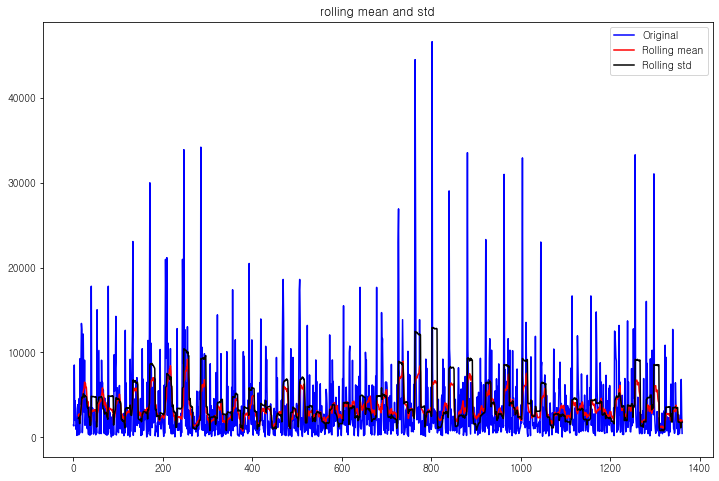

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.093806e+01
p-value                        9.448899e-20
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
floating_pop_cnt_ETC_lf_avg


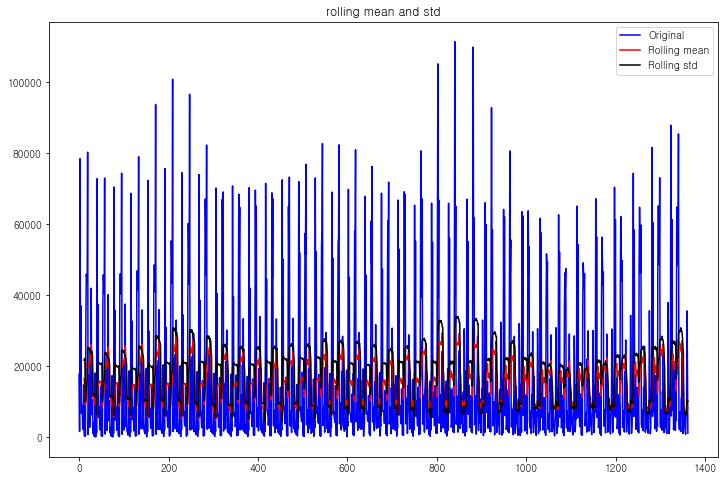

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.206033e+01
p-value                        2.477917e-22
#Lags Used                     1.900000e+01
Number of Observations Used    1.327000e+03
Critival Values(1%)           -3.435287e+00
Critival Values(5%)           -2.863720e+00
Critival Values(10%)          -2.567931e+00
dtype: float64
floating_pop_cnt_lf_gap


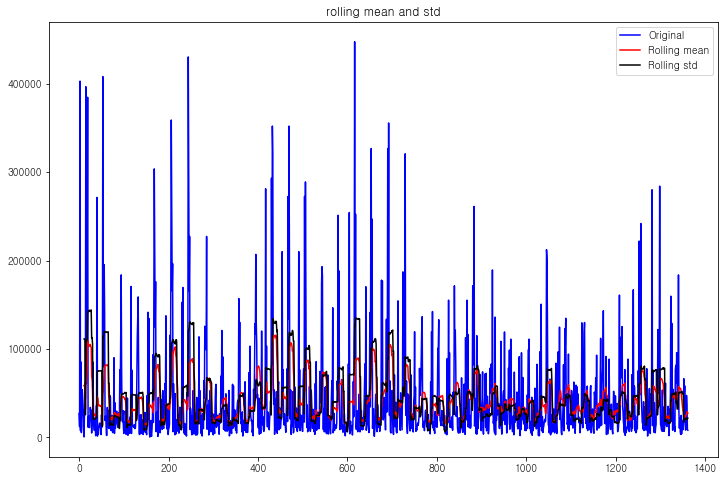

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.139875e+01
p-value                        7.741442e-21
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
floating_pop_cnt_lf_avg


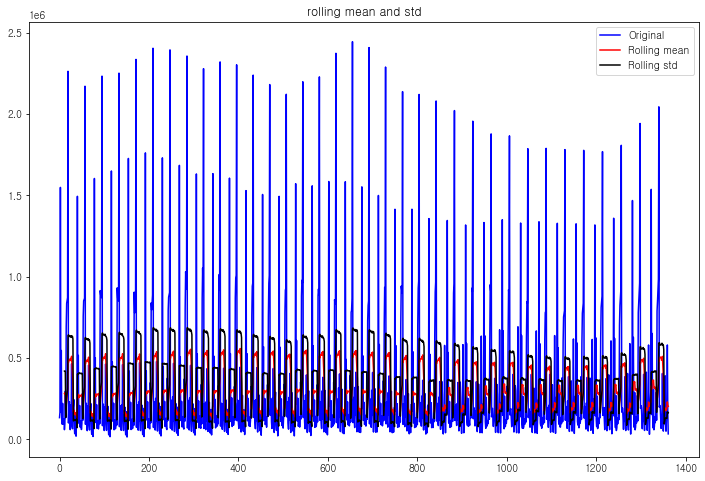

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.014944e+01
p-value                        8.023401e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
visit_rate_CVU_lf_gap


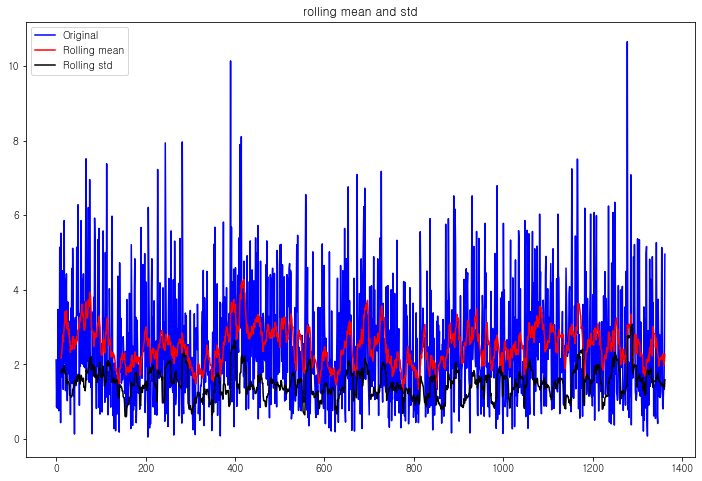

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -5.571577
p-value                           0.000001
#Lags Used                       19.000000
Number of Observations Used    1327.000000
Critival Values(1%)              -3.435287
Critival Values(5%)              -2.863720
Critival Values(10%)             -2.567931
dtype: float64
visit_rate_CVU_lf_avg


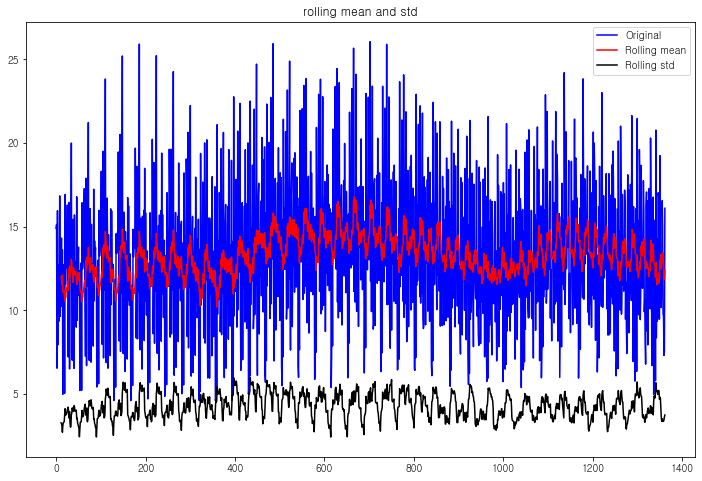

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -5.012860
p-value                           0.000021
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
visit_rate_ETC_lf_gap


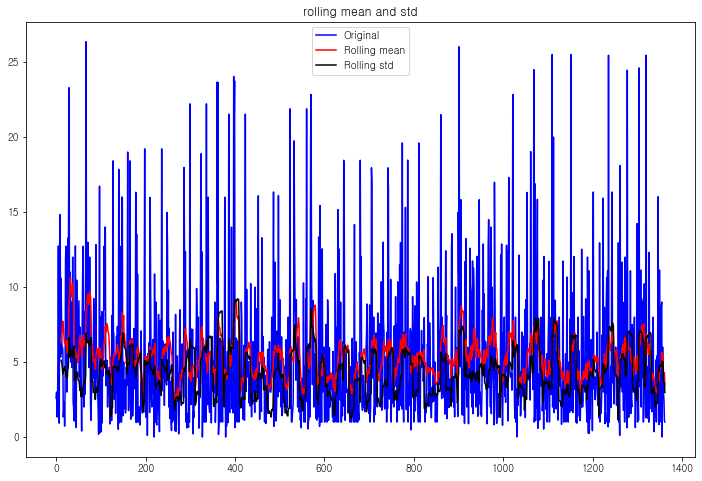

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.381073e+00
p-value                        6.954886e-16
#Lags Used                     1.800000e+01
Number of Observations Used    1.328000e+03
Critival Values(1%)           -3.435284e+00
Critival Values(5%)           -2.863719e+00
Critival Values(10%)          -2.567930e+00
dtype: float64
visit_rate_ETC_lf_avg


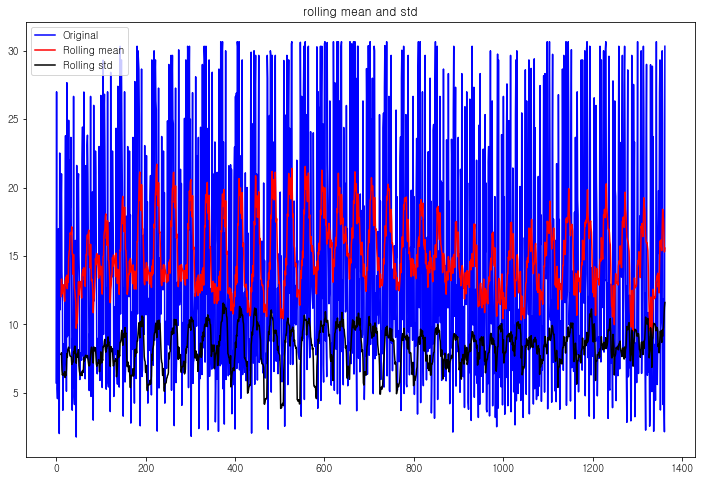

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.065711e+01
p-value                        4.504678e-19
#Lags Used                     1.800000e+01
Number of Observations Used    1.328000e+03
Critival Values(1%)           -3.435284e+00
Critival Values(5%)           -2.863719e+00
Critival Values(10%)          -2.567930e+00
dtype: float64
agri_use_amt_gap


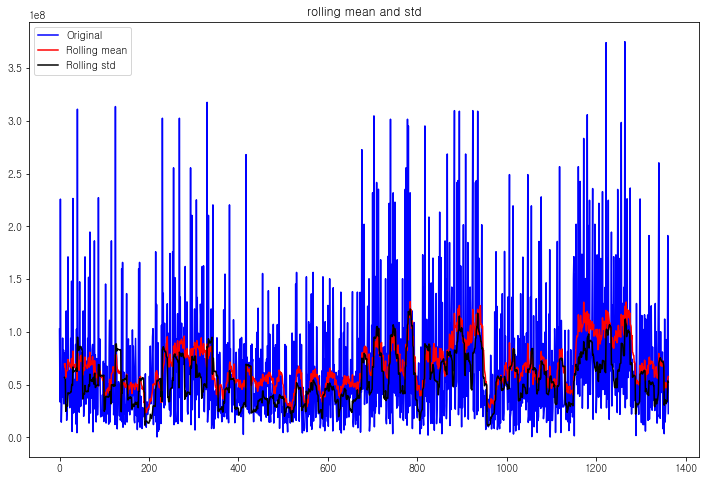

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -5.231858
p-value                           0.000008
#Lags Used                       17.000000
Number of Observations Used    1329.000000
Critival Values(1%)              -3.435280
Critival Values(5%)              -2.863717
Critival Values(10%)             -2.567929
dtype: float64
agri_use_amt_avg


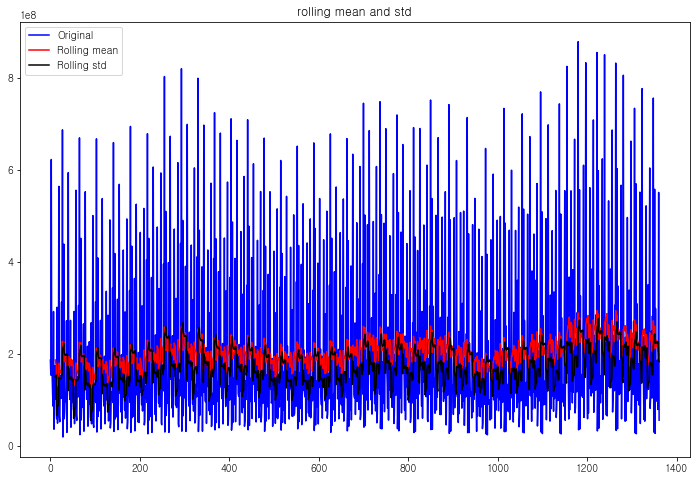

Results of Dickey-Fuller Test
p-value = 0.0005. stationary
Test Statistic                   -4.294009
p-value                           0.000455
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
mart_use_amt_gap


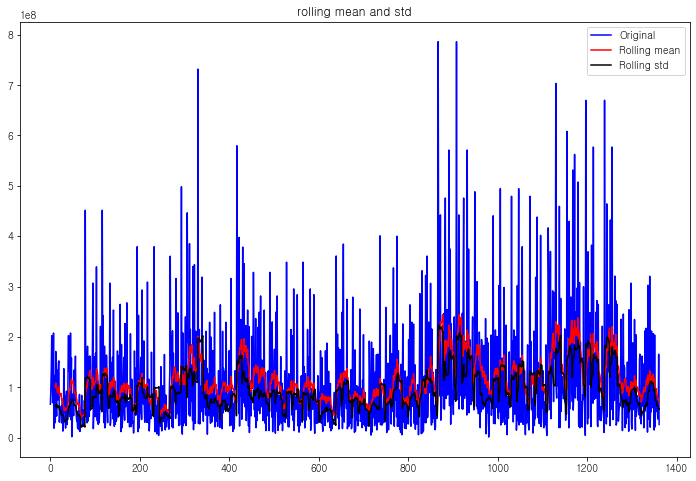

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -5.745174e+00
p-value                        6.145165e-07
#Lags Used                     1.700000e+01
Number of Observations Used    1.329000e+03
Critival Values(1%)           -3.435280e+00
Critival Values(5%)           -2.863717e+00
Critival Values(10%)          -2.567929e+00
dtype: float64
mart_use_amt_avg


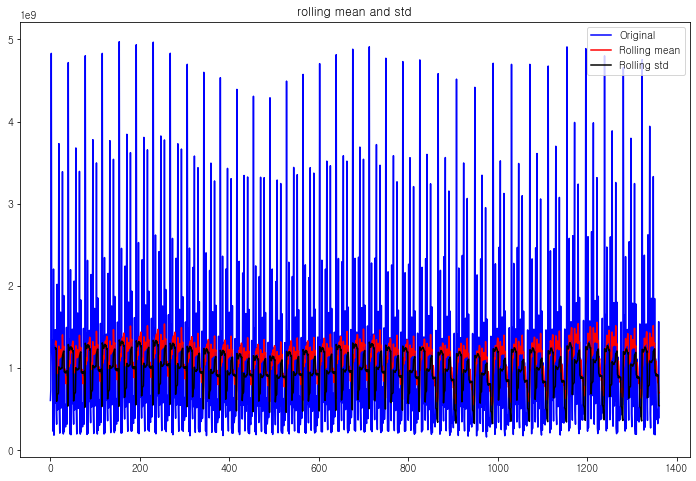

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -1.078544e+01
p-value                        2.200361e-19
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
deli_use_amt_gap


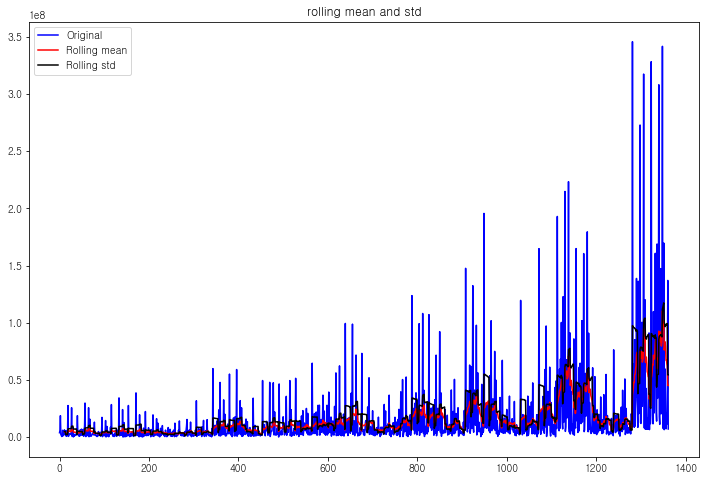

Results of Dickey-Fuller Test
p-value = 0.1324. non-stationary
Test Statistic                   -2.433952
p-value                           0.132382
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
deli_use_amt_avg


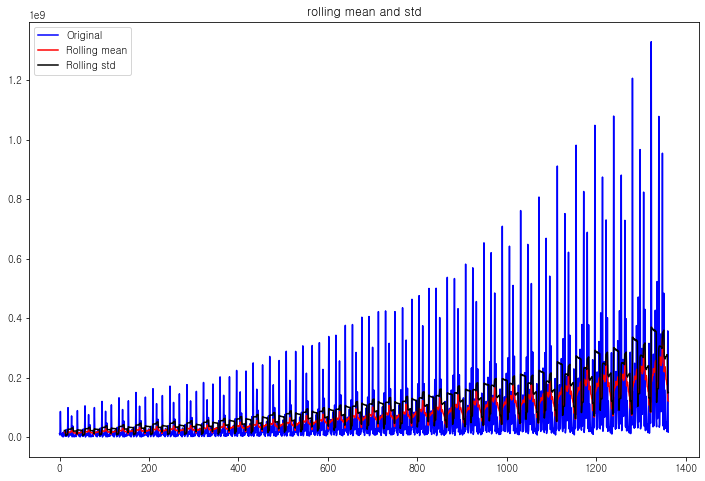

Results of Dickey-Fuller Test
p-value = 0.0928. non-stationary
Test Statistic                   -2.600823
p-value                           0.092827
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
food_use_amt_gap


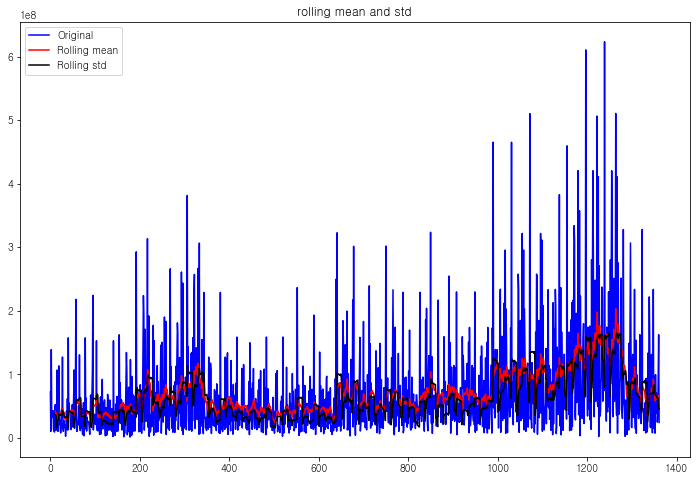

Results of Dickey-Fuller Test
p-value = 0.0327. stationary
Test Statistic                   -3.024197
p-value                           0.032696
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
food_use_amt_avg


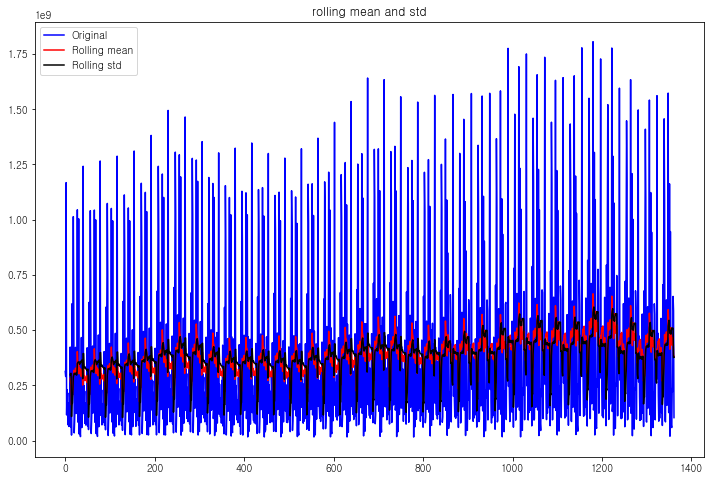

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -6.281607e+00
p-value                        3.784517e-08
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
agri_per_use_amt_gap


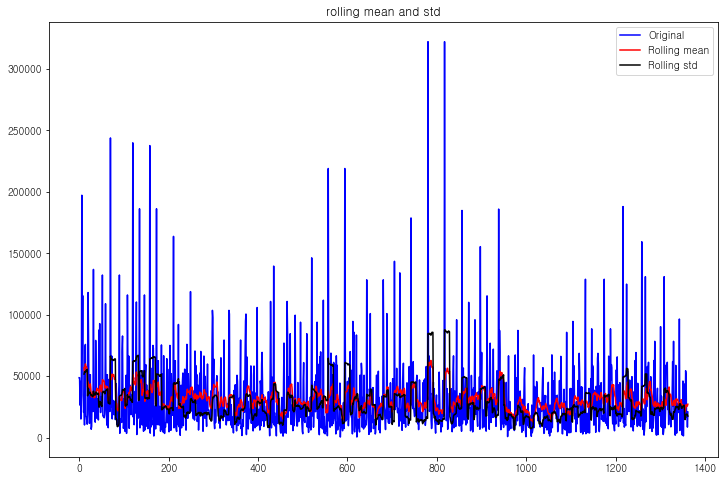

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -8.721457e+00
p-value                        3.376692e-14
#Lags Used                     1.600000e+01
Number of Observations Used    1.330000e+03
Critival Values(1%)           -3.435276e+00
Critival Values(5%)           -2.863716e+00
Critival Values(10%)          -2.567928e+00
dtype: float64
agri_per_use_amt_avg


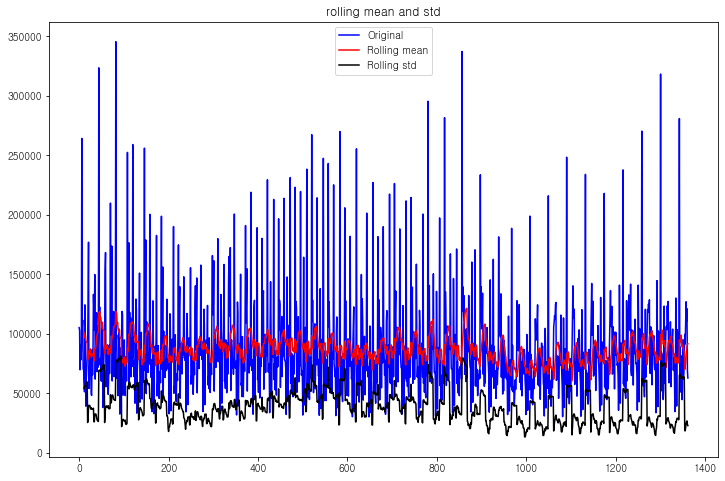

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.182332e+00
p-value                        2.234542e-15
#Lags Used                     2.000000e+01
Number of Observations Used    1.326000e+03
Critival Values(1%)           -3.435291e+00
Critival Values(5%)           -2.863722e+00
Critival Values(10%)          -2.567932e+00
dtype: float64
mart_per_use_amt_gap


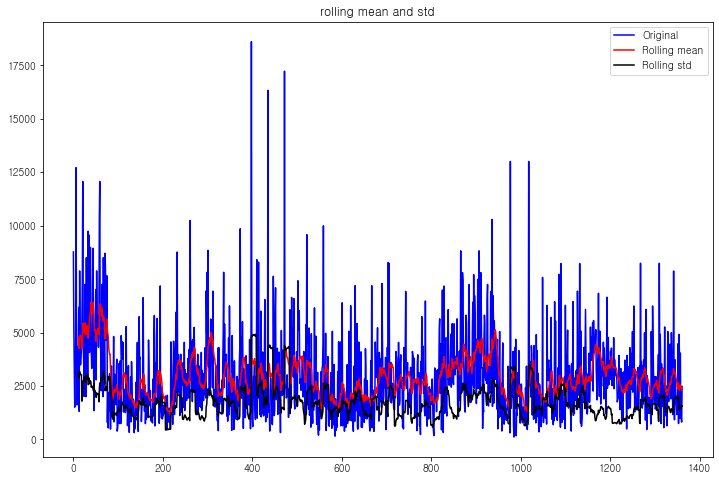

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                   -4.905395
p-value                           0.000034
#Lags Used                       18.000000
Number of Observations Used    1328.000000
Critival Values(1%)              -3.435284
Critival Values(5%)              -2.863719
Critival Values(10%)             -2.567930
dtype: float64
mart_per_use_amt_avg


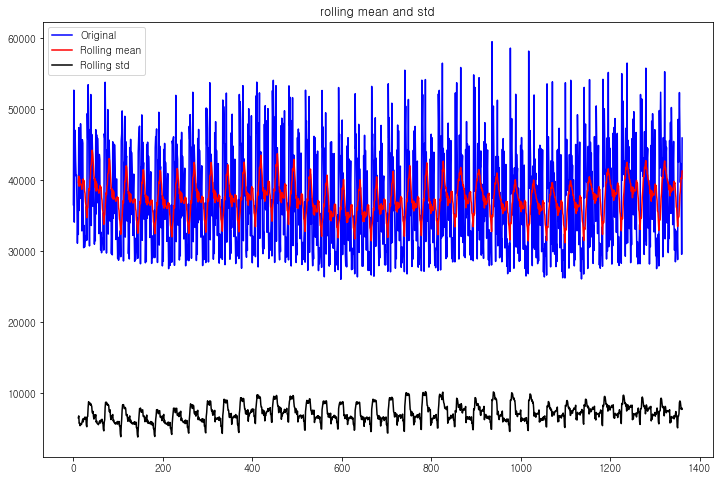

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -9.504483e+00
p-value                        3.375956e-16
#Lags Used                     1.900000e+01
Number of Observations Used    1.327000e+03
Critival Values(1%)           -3.435287e+00
Critival Values(5%)           -2.863720e+00
Critival Values(10%)          -2.567931e+00
dtype: float64
deli_per_use_amt_gap


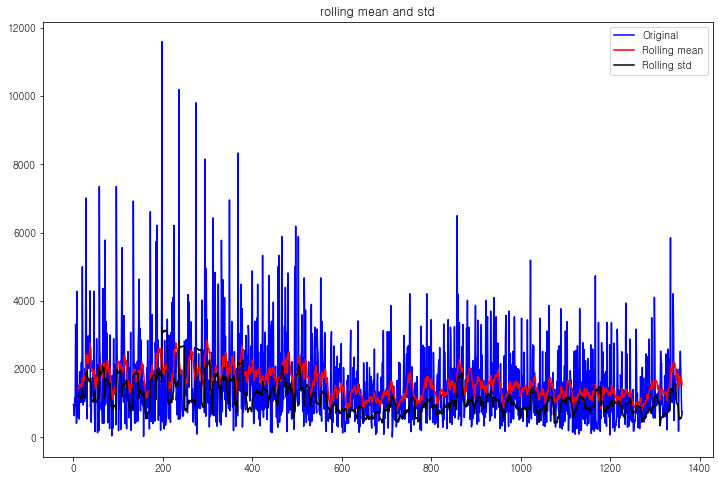

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -6.204201e+00
p-value                        5.710114e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.332000e+03
Critival Values(1%)           -3.435269e+00
Critival Values(5%)           -2.863712e+00
Critival Values(10%)          -2.567927e+00
dtype: float64
deli_per_use_amt_avg


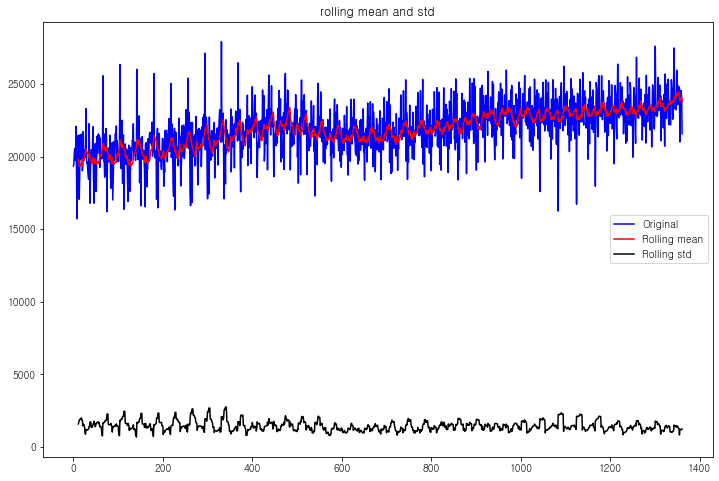

Results of Dickey-Fuller Test
p-value = 0.1253. non-stationary
Test Statistic                   -2.460783
p-value                           0.125310
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64
food_per_use_amt_gap


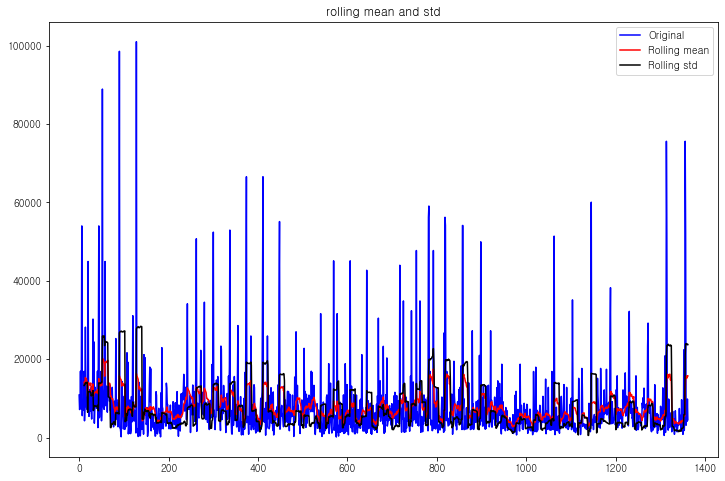

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                -7.088348e+00
p-value                        4.477197e-10
#Lags Used                     1.800000e+01
Number of Observations Used    1.328000e+03
Critival Values(1%)           -3.435284e+00
Critival Values(5%)           -2.863719e+00
Critival Values(10%)          -2.567930e+00
dtype: float64
food_per_use_amt_avg


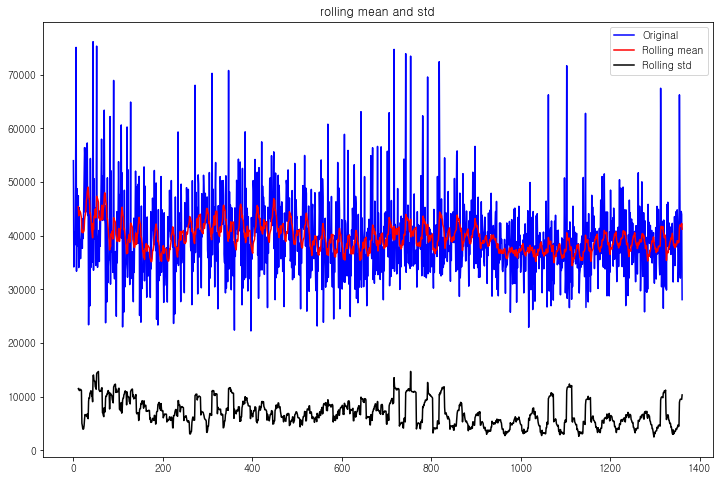

Results of Dickey-Fuller Test
p-value = 0.0003. stationary
Test Statistic                   -4.386307
p-value                           0.000314
#Lags Used                       19.000000
Number of Observations Used    1327.000000
Critival Values(1%)              -3.435287
Critival Values(5%)              -2.863720
Critival Values(10%)             -2.567931
dtype: float64
temperature


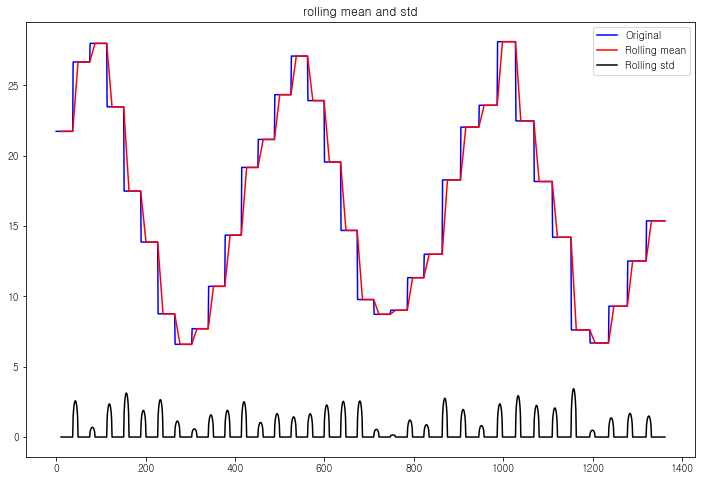

Results of Dickey-Fuller Test
p-value = 0.4167. non-stationary
Test Statistic                   -1.728128
p-value                           0.416681
#Lags Used                        0.000000
Number of Observations Used    1346.000000
Critival Values(1%)              -3.435218
Critival Values(5%)              -2.863690
Critival Values(10%)             -2.567914
dtype: float64
rain


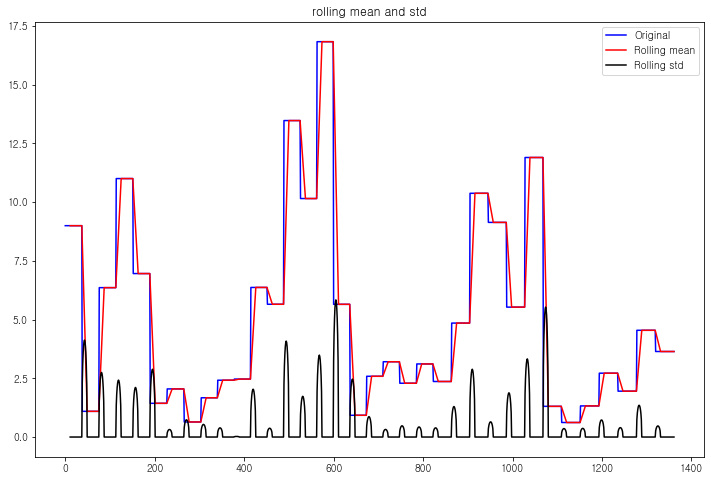

Results of Dickey-Fuller Test
p-value = 0.0169. stationary
Test Statistic                   -3.256610
p-value                           0.016933
#Lags Used                        0.000000
Number of Observations Used    1346.000000
Critival Values(1%)              -3.435218
Critival Values(5%)              -2.863690
Critival Values(10%)             -2.567914
dtype: float64
fine_dust


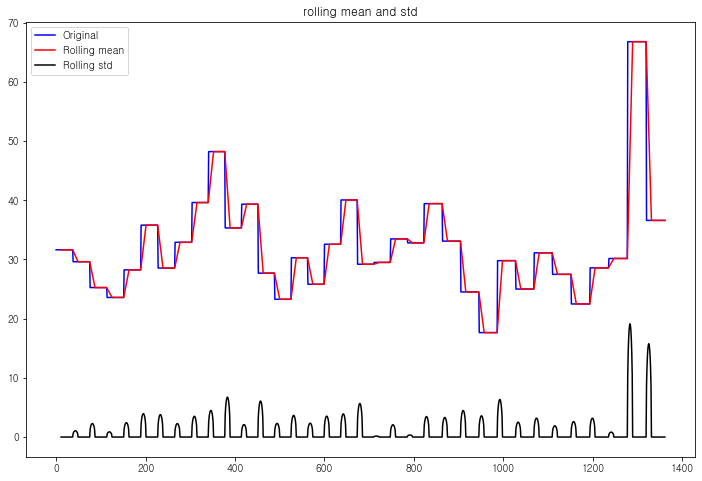

Results of Dickey-Fuller Test
p-value = 0.0074. stationary
Test Statistic                   -3.524255
p-value                           0.007386
#Lags Used                        0.000000
Number of Observations Used    1346.000000
Critival Values(1%)              -3.435218
Critival Values(5%)              -2.863690
Critival Values(10%)             -2.567914
dtype: float64


In [ ]:
for i in l:
    print(i)
    test_stationarity(train[i])

In [ ]:
train2 = train[['floating_resd_rate_60up_gap',
'floating_f_visit_rate_gap',
'deli_use_amt_gap',
'deli_use_amt_avg',
'floating_resd_rate_60up_gap',
'floating_f_visit_rate_gap',
'food_use_amt_gap',
'temperature', 
               'rain']]

In [ ]:
list(train.columns)

['term',
 'emd_nm',
 'em_g_gap',
 'em_g_gap_rate',
 'em_g_avg',
 'em_g_std',
 'resid_reg_pop_gap',
 'resid_reg_pop_gap_rate',
 'resid_reg_pop_avg',
 'resid_reg_pop_std',
 'foreign_pop_gap_rate',
 'foreign_pop_std',
 'total_pop_gap',
 'total_pop_gap_rate',
 'total_pop_avg',
 'total_pop_std',
 'f_resid_reg_rate_gap',
 'f_resid_reg_rate_gap_rate',
 'f_resid_reg_rate_avg',
 'f_resid_reg_rate_std',
 'f_foreign_rate_gap',
 'f_foreign_rate_gap_rate',
 'f_foreign_rate_avg',
 'f_foreign_rate_std',
 'f_total_rate_gap',
 'f_total_rate_gap_rate',
 'f_total_rate_avg',
 'f_total_rate_std',
 'floating_resd_rate_gap',
 'floating_resd_rate_gap_rate',
 'floating_resd_rate_avg',
 'floating_resd_rate_std',
 'floating_pop_cnt_gap',
 'floating_pop_cnt_gap_rate',
 'floating_pop_cnt_avg',
 'floating_pop_cnt_std',
 'floating_visit_rate_1020_gap',
 'floating_visit_rate_1020_gap_rate',
 'floating_visit_rate_1020_avg',
 'floating_visit_rate_1020_std',
 'floating_resd_rate_1020_gap',
 'floating_resd_rate_1020_gap_

In [ ]:
first_diff = train.floating_resd_rate_60up_gap - train.floating_resd_rate_60up_gap.shift(1)
first_diff = first_diff.dropna()


In [ ]:
train.floating_resd_rate_60up_gap = 0

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train.floating_resd_rate_60up_gap = first_diff

In [ ]:
train.floating_resd_rate_60up_gap.fillna(0, inplace=True)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
def test_stationarity2(timeseries, window=12, cutoff=0.01):
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
    
    plt.legend(loc='best')
    plt.title('rolling mean and std')
    plt.show()
    
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag = 'AIC', maxlag=20)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items(): 
        dfoutput['Critival Values(%s)'%key] = value
    pvalue = dftest[1]
    
    if pvalue < cutoff: 
        print('p-value = %.4f. stationary' % pvalue)
    else:
        print('p-value = %.4f. non-stationary' % pvalue)
        
   
    print(dfoutput)

In [ ]:
train['deli_per_use_amt_avg']

0       19351.633833
1       19446.872685
2       20223.640238
3       20568.110798
4       19727.479670
            ...     
1357    24507.665470
1358    23377.265169
1359    24549.136926
1360    23896.168515
1361    21564.675291
Name: deli_per_use_amt_avg, Length: 1347, dtype: float64

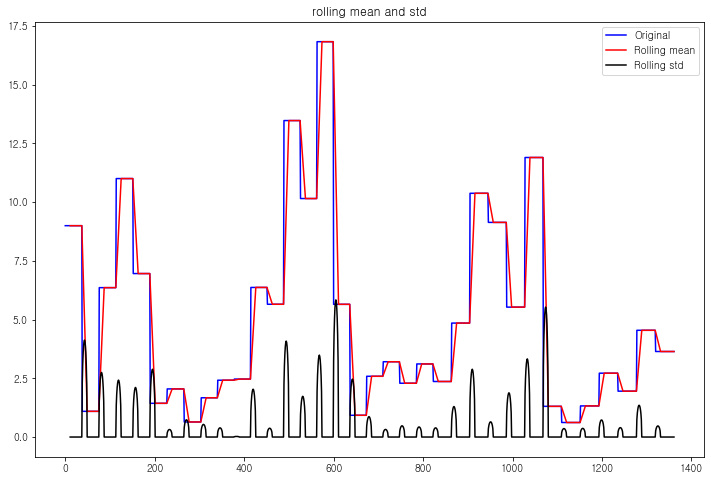

Results of Dickey-Fuller Test
p-value = 0.0169. non-stationary
Test Statistic                   -3.256610
p-value                           0.016933
#Lags Used                        0.000000
Number of Observations Used    1346.000000
Critival Values(1%)              -3.435218
Critival Values(5%)              -2.863690
Critival Values(10%)             -2.567914
dtype: float64


In [ ]:
test_stationarity(train['rain'])

In [ ]:
first_diff = train.rain - train.rain.shift(1)
first_diff = first_diff.dropna()


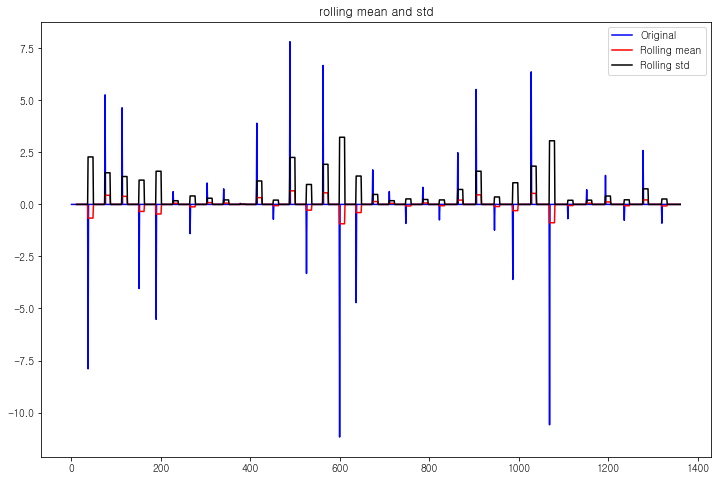

Results of Dickey-Fuller Test
p-value = 0.0000. stationary
Test Statistic                  -36.648144
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1345.000000
Critival Values(1%)              -3.435221
Critival Values(5%)              -2.863691
Critival Values(10%)             -2.567915
dtype: float64


In [ ]:
test_stationarity2(first_diff)

In [ ]:
train[train['deli_per_use_amt_avg']] = first_diff

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-316-5a4b815cdc91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train['deli_per_use_amt_avg']] = first_diff
C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
train['deli_per_use_amt_avg'].isnull().any()

False

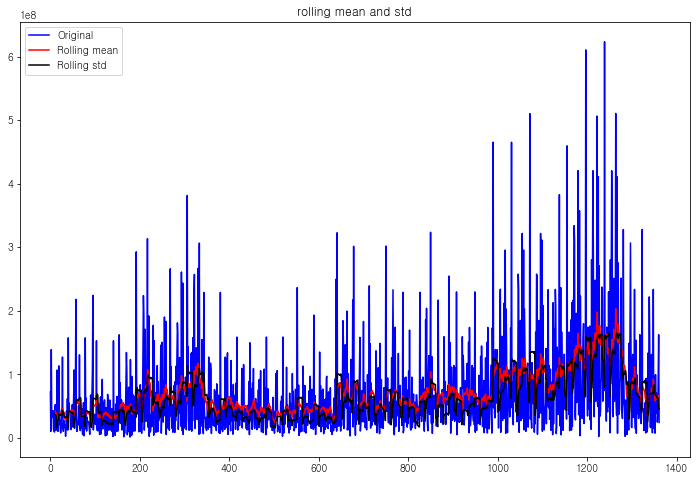

Results of Dickey-Fuller Test
p-value = 0.0327. non-stationary
Test Statistic                   -3.024197
p-value                           0.032696
#Lags Used                       20.000000
Number of Observations Used    1326.000000
Critival Values(1%)              -3.435291
Critival Values(5%)              -2.863722
Critival Values(10%)             -2.567932
dtype: float64


In [ ]:
test_stationarity(train['food_use_amt_gap'])